# Uncovering Patterns in U.S. Flight Data: An Analysis of Delays, Cancellations, and Travel Trends

## Team Members
* Jialin Liu (Project Manager)
* Quan Nguyen
* Varun Kaza

## Table of Contents


---



---



*   [Executive Summary](#scrollTo=2c7eea39-e632-4a95-854a-94101f0bdd90)
*   [Problem Definition](#scrollTo=661d0fc8-efc7-4bb8-bae5-a9eea1e6a962)
*   [Introduction & Motivation](#scrollTo=yqJCh-_c8RtF&line=2&uniqifier=1)
*  [ Data Source](#scrollTo=211b58b0-94c0-415f-95cf-8c530c08ac93)
*   [Data Cleaning](#scrollTo=8cc6dfb0-cbef-4613-9ba8-a1f204ed4274)
* [Exploratory Data Analysis](#scrollTo=j78S2yDC9Mcb&line=1&uniqifier=1)
*  [Conclusion](#scrollTo=4mw6nFwg1EzP)
*  [References](#scrollTo=bhl5BbRd9vkz&line=1&uniqifier=1)
*  [Generative AI Disclosure](#scrollTo=24c2baef-9ea9-4f76-89b7-a25447887441&line=2&uniqifier=1)

## Executive Summary
This report provides an in-depth analysis of U.S. flight data, uncovering patterns of delays, cancellations, and broader travel trends in the aviation industry. Our primary objective is to identify the key factors affecting flight performance, including the impact of weather, operational inefficiencies, and other contributing factors on overall flight operations. By analyzing these factors, we aim to offer actionable insights to enhance the operational efficiency and resilience of the aviation sector.

Our approach involved comprehensive exploratory data analysis (EDA), covering various aspects such as the time periods examined, unique airlines and airports, average flight distances, and discrepancies between scheduled and actual flight times. We identified the busiest airports based on originating and arriving flights, analyzed the main reasons for flight cancellations, and assessed key contributors to delays. Moreover, we explored delay patterns across different times of the day, days of the week, and months of the year to provide a thorough understanding of operational trends and impacts.

In addition to EDA, we applied machine learning techniques to further analyze the dataset and uncover hidden patterns. The model was used to predict flight cancellations based on factors such as weather conditions and airport scheduling hour. The application of machine learning allowed us to identify high-risk flights and understand the key predictors of cancellations, providing stakeholders with a valuable tool for proactive decision-making. We used random forests model to evaluate the performance of various predictors and ultimately improved the model to provide the highest accuracy for predicting cancellations.

Key findings include the most frequent causes of flight delays, the primary reasons for cancellations, a listing of frequently affected airports and airlines, and a summary of overarching flight patterns. The analysis also highlights the broader operational issues linked to carrier inefficiencies and delayed aircraft, emphasizing the need for strategic interventions.

In addition, our analysis of weather data revealed significant insights into how different weather conditions contribute to flight delays and cancellations. Adverse weather, such as thunderstorms, snow, and high winds, was found to be a major cause of disruptions, particularly affecting airports in regions prone to severe seasonal weather. We observed that winter months had higher rates of cancellations and delays due to snowstorms, while summer months experienced disruptions primarily due to thunderstorms and severe weather warnings. Airports located in coastal regions were more susceptible to delays caused by hurricanes and heavy rain. These findings emphasize the importance of enhancing weather forecasting and response strategies to mitigate the impact of adverse weather on flight operations.

Ultimately, this report aims to provide a clear understanding of the challenges impacting flight operations, empowering stakeholders to make informed decisions that enhance the reliability, efficiency, and overall passenger experience within the aviation industry.

## Problem Definition
This project aims to uncover patterns and identify the key factors that affect flight performance within the U.S. aviation sector. Flight delays and cancellations are common issues that significantly impact the efficiency of airline operations, resulting in financial losses for airlines and considerable inconvenience for passengers. By analyzing comprehensive flight data, including metrics such as delays, cancellations, and travel trends, we seek to provide a holistic understanding of the underlying causes.

Our analysis focuses on examining various contributors to disruptions, including carrier-related issues, national air system delays, late aircraft, and weather conditions. The goal is to derive actionable insights that will help stakeholders—including airlines, airports, and policymakers—develop strategies to mitigate disruptions, improve operational resilience, and enhance the passenger experience. Ultimately, this project provides the aviation industry with data-driven insights to better predict and respond to the multiple factors that disrupt flight operations.

## Motivation

The aviation industry plays a vital role in the global economy, making it essential to analyze flight data for insights into seasonal trends, peak travel periods, and consumer behavior. Understanding these dynamics allows airlines to optimize their schedules and capacity, leading to improved operational efficiency. By focusing on delays and cancellations, airlines can identify and address inefficiencies, enhancing service quality and customer satisfaction. This analysis not only benefits the airlines but also contributes to a more reliable and efficient travel experience for passengers. We are keen to explore this dataset in the initial stage of this project to know the summary of the aviation industry in the United States. An exploration of this dataset will allow us to frame our problem more coherently, given that we will be able to provide context using our findings. 

## Data & Source
The flight data is sourced from the Bureau of Transportation Statistics (BTS) within the U.S. Department of Transportation, specifically the "Airline On-Time Performance and Causes of Flight Delays" dataset. The weather data is sourced from the National Centers for Environmental Information.

### Online Resource
 Bureau of Transportation Statistics Official Website: https://www.transtats.bts.gov/
 National Centers for Environmental Information Website: https://www.ncei.noaa.gov/

## Data Cleaning

### Mounting from Google Cloud Bucket
We mount a total of 31 files from Google Cloud Bucket and combine them into 1 parquet file

In [48]:
# Importing Libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, col, date_format, when, lpad, concat, lit, split, trim, monotonically_increasing_id

In [49]:
# Configuring Spark Session
spark = SparkSession.builder \
    .appName("GCS_Data_Loading") \
    .getOrCreate()

24/12/03 17:34:54 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [50]:
spark.conf.set("spark.hadoop.fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")
spark.conf.set("spark.hadoop.google.cloud.auth.service.account.enable", "true")
spark.conf.set("spark.hadoop.google.cloud.auth.service.account.json.keyfile", "path_to_your_service_account_key.json")

In [ ]:
# Load data from GCS
gcs_path = 'gs://qst843-03/ontime_reporting/T_ONTIME_REPORTING_*.csv'
df = spark.read.csv(gcs_path, header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: integer (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- FLIGHTS: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: double (nullable = true)
 |-- LATE_AIRCRAF

In [ ]:
# Step 1: Convert 'FL_DATE' to a timestamp using the appropriate format
df = df.withColumn('FL_DATE_TIMESTAMP', to_timestamp('FL_DATE', 'M/d/yyyy hh:mm:ss a'))

# Step 2: Extract the date part and overwrite 'FL_DATE'
df = df.withColumn('FL_DATE', date_format('FL_DATE_TIMESTAMP', 'M/d/yyyy'))

# Step 3: Extract the time part and create a new column 'FL_TIME'
df = df.withColumn('FL_TIME', date_format('FL_DATE_TIMESTAMP', 'HH:mm:ss'))

# Step 4: Drop the temporary timestamp column
df = df.drop('FL_DATE_TIMESTAMP')

In [ ]:
df.select('FL_DATE', 'FL_TIME').show()

+---------+--------+
|  FL_DATE| FL_TIME|
+---------+--------+
|7/14/2024|00:00:00|
|7/16/2024|00:00:00|
|7/11/2024|00:00:00|
|7/13/2024|00:00:00|
|7/16/2024|00:00:00|
|7/19/2024|00:00:00|
|7/23/2024|00:00:00|
|7/17/2024|00:00:00|
|7/17/2024|00:00:00|
|7/29/2024|00:00:00|
| 7/7/2024|00:00:00|
|7/30/2024|00:00:00|
| 7/8/2024|00:00:00|
|7/22/2024|00:00:00|
|7/15/2024|00:00:00|
|7/28/2024|00:00:00|
| 7/6/2024|00:00:00|
|7/17/2024|00:00:00|
| 7/8/2024|00:00:00|
|7/10/2024|00:00:00|
+---------+--------+
only showing top 20 rows



In [ ]:
# Handling the older date formats
# Step 1: Set Spark's legacy time parser policy to handle older date formats
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

# Step 2: Update integer time columns to HH:mm:ss format
time_columns = ["CRS_DEP_TIME", "DEP_TIME", "CRS_ARR_TIME", "ARR_TIME"]

for col_name in time_columns:
    # Convert the integer to string and pad with zeros if needed
    df = df.withColumn(col_name, lpad(col(col_name).cast("string"), 4, '0'))  # Ensure 4 digits

    # Update the column to HH:mm:ss format
    df = df.withColumn(col_name,
                       concat(col(col_name).substr(1, 2),
                              lit(":"),
                              col(col_name).substr(3, 2),
                              lit(":00")))

# Step 3: Show the updated DataFrame with the original time columns
df.select(time_columns).show(5)

+------------+--------+------------+--------+
|CRS_DEP_TIME|DEP_TIME|CRS_ARR_TIME|ARR_TIME|
+------------+--------+------------+--------+
|    21:28:00|22:57:00|    22:34:00|23:59:00|
|    23:46:00|00:41:00|    07:59:00|08:17:00|
|    19:59:00|19:57:00|    22:59:00|22:41:00|
|    08:40:00|08:46:00|    10:15:00|10:16:00|
|    18:15:00|18:11:00|    19:28:00|19:24:00|
+------------+--------+------------+--------+
only showing top 5 rows



In [ ]:
# Updating the CANCELLED column
df = df.withColumn("CANCELLED", when(col("CANCELLED") == 1.0, "Yes").otherwise("No"))

In [ ]:
# Step 1: Create a mapping for cancellation codes
cancellation_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Step 2: Rename the column from CANCELLATION_CODE to CANCELLATION_REASON
df = df.withColumnRenamed("CANCELLATION_CODE", "CANCELLATION_REASON")

# Step 3: Clean the CANCELLATION_REASON column by mapping values
df = df.withColumn("CANCELLATION_REASON",
                   when(col("CANCELLATION_REASON").isNull(), "Not Cancelled")
                   .when(col("CANCELLATION_REASON") == 'A', cancellation_mapping['A'])
                   .when(col("CANCELLATION_REASON") == 'B', cancellation_mapping['B'])
                   .when(col("CANCELLATION_REASON") == 'C', cancellation_mapping['C'])
                   .when(col("CANCELLATION_REASON") == 'D', cancellation_mapping['D'])
                   .otherwise("Not Cancelled"))  # Handle any other unexpected values

# Step 4: Show the updated DataFrame with the CANCELLATION_REASON column
df.select("CANCELLATION_REASON").show(5)

+-------------------+
|CANCELLATION_REASON|
+-------------------+
|      Not Cancelled|
|      Not Cancelled|
|      Not Cancelled|
|      Not Cancelled|
|      Not Cancelled|
+-------------------+
only showing top 5 rows



In [ ]:
# Step 1: Update the DIVERTED column
df = df.withColumn("DIVERTED",
                   when(col("DIVERTED") == 1.0, "Yes")
                   .otherwise("No"))  # Change 0.0 to "No"

# Step 2: Show the updated DataFrame with the DIVERTED column
df.select("DIVERTED").show(5)

+--------+
|DIVERTED|
+--------+
|      No|
|      No|
|      No|
|      No|
|      No|
+--------+
only showing top 5 rows



In [ ]:
## Specifying the Columns with Air Time
## Converting FLIGHTS Column Type to Integer
## Renaming Distance Column to Specify Unit of Measurement

# Step 1: Rename time-related columns to include "(minutes)"
df = df.withColumnRenamed("CRS_ELAPSED_TIME", "CRS_ELAPSED_TIME (minutes)") \
       .withColumnRenamed("ACTUAL_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME (minutes)") \
       .withColumnRenamed("AIR_TIME", "AIR_TIME (minutes)")

# Step 2: Convert FLIGHTS column from double to integer
df = df.withColumn("FLIGHTS", col("FLIGHTS").cast("integer"))

# Step 3: Rename DISTANCE column to include "(miles)"
df = df.withColumnRenamed("DISTANCE", "DISTANCE (miles)")

# Step 4: Show the updated DataFrame with the modified columns
df.select("CRS_ELAPSED_TIME (minutes)", "ACTUAL_ELAPSED_TIME (minutes)", "AIR_TIME (minutes)", "FLIGHTS", "DISTANCE (miles)").show(5)

+--------------------------+-----------------------------+------------------+-------+----------------+
|CRS_ELAPSED_TIME (minutes)|ACTUAL_ELAPSED_TIME (minutes)|AIR_TIME (minutes)|FLIGHTS|DISTANCE (miles)|
+--------------------------+-----------------------------+------------------+-------+----------------+
|                      66.0|                         62.0|              35.0|      1|           197.0|
|                     313.0|                        276.0|             257.0|      1|          2411.0|
|                     120.0|                        104.0|              79.0|      1|           606.0|
|                     155.0|                        150.0|             131.0|      1|           955.0|
|                      73.0|                         73.0|              38.0|      1|           199.0|
+--------------------------+-----------------------------+------------------+-------+----------------+
only showing top 5 rows



In [ ]:
df.unpersist()

DataFrame[FL_DATE: string, OP_CARRIER_AIRLINE_ID: int, TAIL_NUM: string, OP_CARRIER_FL_NUM: int, ORIGIN_AIRPORT_ID: int, DEST_AIRPORT_ID: int, CRS_DEP_TIME: string, DEP_TIME: string, CRS_ARR_TIME: string, ARR_TIME: string, CANCELLED: string, CANCELLATION_REASON: string, DIVERTED: string, CRS_ELAPSED_TIME (minutes): double, ACTUAL_ELAPSED_TIME (minutes): double, AIR_TIME (minutes): double, FLIGHTS: int, DISTANCE (miles): double, CARRIER_DELAY: double, WEATHER_DELAY: double, NAS_DELAY: double, SECURITY_DELAY: double, LATE_AIRCRAFT_DELAY: double, FL_TIME: string]

In [ ]:
df.cache()

DataFrame[FL_DATE: string, OP_CARRIER_AIRLINE_ID: int, TAIL_NUM: string, OP_CARRIER_FL_NUM: int, ORIGIN_AIRPORT_ID: int, DEST_AIRPORT_ID: int, CRS_DEP_TIME: string, DEP_TIME: string, CRS_ARR_TIME: string, ARR_TIME: string, CANCELLED: string, CANCELLATION_REASON: string, DIVERTED: string, CRS_ELAPSED_TIME (minutes): double, ACTUAL_ELAPSED_TIME (minutes): double, AIR_TIME (minutes): double, FLIGHTS: int, DISTANCE (miles): double, CARRIER_DELAY: double, WEATHER_DELAY: double, NAS_DELAY: double, SECURITY_DELAY: double, LATE_AIRCRAFT_DELAY: double, FL_TIME: string]

In [ ]:
df.show(1)

+---------+---------------------+--------+-----------------+-----------------+---------------+------------+--------+------------+--------+---------+-------------------+--------+--------------------------+-----------------------------+------------------+-------+----------------+-------------+-------------+---------+--------------+-------------------+--------+
|  FL_DATE|OP_CARRIER_AIRLINE_ID|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|DEST_AIRPORT_ID|CRS_DEP_TIME|DEP_TIME|CRS_ARR_TIME|ARR_TIME|CANCELLED|CANCELLATION_REASON|DIVERTED|CRS_ELAPSED_TIME (minutes)|ACTUAL_ELAPSED_TIME (minutes)|AIR_TIME (minutes)|FLIGHTS|DISTANCE (miles)|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY| FL_TIME|
+---------+---------------------+--------+-----------------+-----------------+---------------+------------+--------+------------+--------+---------+-------------------+--------+--------------------------+-----------------------------+------------------+-------+----------------+

In [ ]:
# Define the path to your GCS bucket and file name
gcs_path = "gs://qst843-03/ontime_reporting/cleaned_data.parquet"

# Write the DataFrame to GCS in Parquet format
df.write.mode("overwrite").parquet(gcs_path)

### Cleaning dictionary tables for later use

In [5]:
# Load Lookup Tables
lookup_path = "gs://qst843-03/lookup_tables/"
print(lookup_path)

gs://qst843-03/lookup_tables/


In [6]:
# Airline ID dataframe
airline_id = spark.read.csv(lookup_path + "L_AIRLINE_ID.csv", header=True, inferSchema=True)

# Rename 'Code' column to 'ID' and trim spaces
df_airline_cleaned = airline_id.withColumnRenamed("Code", "ID") \
    .withColumn("Description", trim(airline_id["Description"]))  # Trim the Description column

# Split the 'Description' column into Name and Code
df_airline_cleaned = df_airline_cleaned.withColumn("Name", trim(split(df_airline_cleaned["Description"], ":")[0])) \
    .withColumn("Code", trim(split(df_airline_cleaned["Description"], ":")[1])) \
    .select("ID", "Code", "Name")

# Show the cleaned DataFrame
df_airline_cleaned.show(truncate=False)

+-----+----+---------------------------+
|ID   |Code|Name                       |
+-----+----+---------------------------+
|19031|MAC |Mackey International Inc.  |
|19032|XY  |Munz Northern Airlines Inc.|
|19033|COC |Cochise Airlines Inc.      |
|19034|GSA |Golden Gate Airlines Inc.  |
|19035|RZZ |Aeromech Inc.              |
|19036|GLW |Golden West Airlines Co.   |
|19037|PRN |Puerto Rico Intl Airlines  |
|19038|STZ |Air America Inc.           |
|19039|SWT |Swift Aire Lines Inc.      |
|19040|TSF |American Central Airlines  |
|19041|VEZ |Valdez Airlines            |
|19042|WEB |Southeast Alaska Airlines  |
|19043|AAR |Altair Airlines Inc.       |
|19044|CHI |Chitina Air Service        |
|19045|MRC |Marco Island Airways Inc.  |
|19046|OHZ |Caribbean Air Services Inc.|
|19047|PRO |Sundance Airlines          |
|19048|SAI |Seair Alaska Airlines Inc. |
|19049|SLZ |Southeast Airlines Inc.    |
|19050|AAZ |Alaska Aeronautical Indust.|
+-----+----+---------------------------+
only showing top

In [7]:
# Airport ID dataframe
airport_id = spark.read.csv(lookup_path + "L_AIRPORT_ID.csv", header=True, inferSchema=True)

# Split the 'Description' column into Name and Location
df_airport_cleaned = airport_id.withColumn("Location", trim(split(airport_id["Description"], ":")[0])) \
    .withColumn("Name", trim(split(airport_id["Description"], ":")[1])) \
    .select("Code", "Name", "Location")  # Select only the required columns

# Rename 'Code' to 'ID'
df_airport_cleaned = df_airport_cleaned.withColumnRenamed("Code", "ID")

# Extract State from Location
df_airport_cleaned = df_airport_cleaned.withColumn("State", trim(split(df_airport_cleaned["Location"], ",")[1]))

# Show the DataFrame with the desired column order
df_airport_cleaned = df_airport_cleaned.select("ID", "Name", "Location", "State")

# Show the cleaned DataFrame
df_airport_cleaned.show(truncate=False)

+-----+------------------------+----------------------------+-----+
|ID   |Name                    |Location                    |State|
+-----+------------------------+----------------------------+-----+
|10001|Afognak Lake Airport    |Afognak Lake, AK            |AK   |
|10003|Bear Creek Mining Strip |Granite Mountain, AK        |AK   |
|10004|Lik Mining Camp         |Lik, AK                     |AK   |
|10005|Little Squaw Airport    |Little Squaw, AK            |AK   |
|10006|Kizhuyak Bay            |Kizhuyak, AK                |AK   |
|10007|Klawock Seaplane Base   |Klawock, AK                 |AK   |
|10008|Elizabeth Island Airport|Elizabeth Island, AK        |AK   |
|10009|Augustin Island         |Homer, AK                   |AK   |
|10010|Columbia County         |Hudson, NY                  |NY   |
|10011|Grand Canyon West       |Peach Springs, AZ           |AZ   |
|10012|Blairstown Airport      |Blairstown, NJ              |NJ   |
|10013|Crosbyton Municipal     |Crosbyton, TX   

### Showing main dataframe

In [46]:
from pyspark.sql.functions import *

In [51]:
# Step 1: Create or get your Spark session
spark = SparkSession.builder \
    .appName("Load Data from GCS") \
    .getOrCreate()

# Step 2: Define the path to your GCS bucket and the file you saved
gcs_path = "gs://qst843-03/ontime_reporting/cleaned_data.parquet"

# Step 3: Load the DataFrame from GCS
df_cleaned = spark.read.parquet(gcs_path)

# Step 4: Show the loaded DataFrame to verify
df_cleaned.show(5, False)

24/12/03 17:35:07 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+--------+---------------------+--------+-----------------+-----------------+---------------+------------+--------+------------+--------+---------+-------------------+--------+--------------------------+-----------------------------+------------------+-------+----------------+-------------+-------------+---------+--------------+-------------------+--------+
|FL_DATE |OP_CARRIER_AIRLINE_ID|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|DEST_AIRPORT_ID|CRS_DEP_TIME|DEP_TIME|CRS_ARR_TIME|ARR_TIME|CANCELLED|CANCELLATION_REASON|DIVERTED|CRS_ELAPSED_TIME (minutes)|ACTUAL_ELAPSED_TIME (minutes)|AIR_TIME (minutes)|FLIGHTS|DISTANCE (miles)|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY|FL_TIME |
+--------+---------------------+--------+-----------------+-----------------+---------------+------------+--------+------------+--------+---------+-------------------+--------+--------------------------+-----------------------------+------------------+-------+----------------+---

In [ ]:
# Get the number of rows
num_rows = df_cleaned.count()

# Get the number of columns
num_columns = len(df_cleaned.columns)

# Print the shape
print(f"Shape of the DataFrame: ({num_rows}, {num_columns})")

Shape of the DataFrame: (17672956, 24)


In [ ]:
df_cleaned.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- CRS_DEP_TIME: string (nullable = true)
 |-- DEP_TIME: string (nullable = true)
 |-- CRS_ARR_TIME: string (nullable = true)
 |-- ARR_TIME: string (nullable = true)
 |-- CANCELLED: string (nullable = true)
 |-- CANCELLATION_REASON: string (nullable = true)
 |-- DIVERTED: string (nullable = true)
 |-- CRS_ELAPSED_TIME (minutes): double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME (minutes): double (nullable = true)
 |-- AIR_TIME (minutes): double (nullable = true)
 |-- FLIGHTS: integer (nullable = true)
 |-- DISTANCE (miles): double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: doubl

In [ ]:
df_cleaned.columns

['FL_DATE',
 'OP_CARRIER_AIRLINE_ID',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'DEST_AIRPORT_ID',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'CANCELLED',
 'CANCELLATION_REASON',
 'DIVERTED',
 'CRS_ELAPSED_TIME (minutes)',
 'ACTUAL_ELAPSED_TIME (minutes)',
 'AIR_TIME (minutes)',
 'FLIGHTS',
 'DISTANCE (miles)',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'FL_TIME']

In [ ]:
df_cleaned.dtypes

[('FL_DATE', 'string'),
 ('OP_CARRIER_AIRLINE_ID', 'int'),
 ('TAIL_NUM', 'string'),
 ('OP_CARRIER_FL_NUM', 'int'),
 ('ORIGIN_AIRPORT_ID', 'int'),
 ('DEST_AIRPORT_ID', 'int'),
 ('CRS_DEP_TIME', 'string'),
 ('DEP_TIME', 'string'),
 ('CRS_ARR_TIME', 'string'),
 ('ARR_TIME', 'string'),
 ('CANCELLED', 'string'),
 ('CANCELLATION_REASON', 'string'),
 ('DIVERTED', 'string'),
 ('CRS_ELAPSED_TIME (minutes)', 'double'),
 ('ACTUAL_ELAPSED_TIME (minutes)', 'double'),
 ('AIR_TIME (minutes)', 'double'),
 ('FLIGHTS', 'int'),
 ('DISTANCE (miles)', 'double'),
 ('CARRIER_DELAY', 'double'),
 ('WEATHER_DELAY', 'double'),
 ('NAS_DELAY', 'double'),
 ('SECURITY_DELAY', 'double'),
 ('LATE_AIRCRAFT_DELAY', 'double'),
 ('FL_TIME', 'string')]

In [ ]:
# Replace all NaN values with 0.0
df_cleaned = df_cleaned.fillna(0.0)


In [ ]:
df_cleaned.limit(3).toPandas()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,...,ACTUAL_ELAPSED_TIME (minutes),AIR_TIME (minutes),FLIGHTS,DISTANCE (miles),CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FL_TIME
0,5/19/2024,19393,N8699A,1394,14730,12889,10:50:00,10:51:00,11:55:00,11:41:00,...,230.0,214.0,1,1624.0,0.0,0.0,0.0,0.0,0.0,00:00:00
1,5/25/2024,20363,N299PQ,5212,10792,12953,07:05:00,06:59:00,08:34:00,08:05:00,...,66.0,49.0,1,292.0,0.0,0.0,0.0,0.0,0.0,00:00:00
2,5/28/2024,19805,N873NN,2360,11298,15370,16:35:00,18:07:00,17:43:00,19:32:00,...,85.0,41.0,1,237.0,0.0,11.0,17.0,0.0,81.0,00:00:00


In [89]:
print("Number of rows in the dataset:")
df_cleaned.count()

Number of rows in the dataset:


17672956

In [11]:
from pyspark.sql.functions import when

# Fill TAIL_NUM nulls with 'UNKNOWN'
df_cleaned = df_cleaned.fillna({"TAIL_NUM": "UNKNOWN"})

# Replace DEP_TIME and ARR_TIME nulls with '00:00:00'
df_cleaned = df_cleaned.fillna({"DEP_TIME": "00:00:00", "ARR_TIME": "00:00:00"})

# Drop rows where CRS_ELAPSED_TIME is null
df_cleaned = df_cleaned.filter(df_cleaned["CRS_ELAPSED_TIME (minutes)"].isNotNull())

# Fill ACTUAL_ELAPSED_TIME and AIR_TIME nulls with 0
df_cleaned = df_cleaned.fillna({"ACTUAL_ELAPSED_TIME (minutes)": 0, "AIR_TIME (minutes)": 0})

# Fill delay columns with 0
delay_cols = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
df_cleaned = df_cleaned.fillna({col: 0 for col in delay_cols})

In [12]:
df_cleaned.cache()

DataFrame[FL_DATE: string, OP_CARRIER_AIRLINE_ID: int, TAIL_NUM: string, OP_CARRIER_FL_NUM: int, ORIGIN_AIRPORT_ID: int, DEST_AIRPORT_ID: int, CRS_DEP_TIME: string, DEP_TIME: string, CRS_ARR_TIME: string, ARR_TIME: string, CANCELLED: string, CANCELLATION_REASON: string, DIVERTED: string, CRS_ELAPSED_TIME (minutes): double, ACTUAL_ELAPSED_TIME (minutes): double, AIR_TIME (minutes): double, FLIGHTS: int, DISTANCE (miles): double, CARRIER_DELAY: double, WEATHER_DELAY: double, NAS_DELAY: double, SECURITY_DELAY: double, LATE_AIRCRAFT_DELAY: double, FL_TIME: string]

### Cleaning the Weather Data

In [52]:
weather_file_path = "gs://qst843-03/Weather Daily/Weather Daily-Weather Daily Data 2022-2024.csv"

In [53]:
weather_df = spark.read.csv(weather_file_path, header=True, inferSchema=True)

In [54]:
# Mapping of airport IDs and names
airport_mapping = [
    (10397, "Hartsfield-Jackson Atlanta International"),
    (10721, "Logan International"),
    (11057, "Charlotte Douglas International"),
    (11278, "Ronald Reagan Washington National"),
    (11292, "Denver International"),
    (11298, "Dallas/Fort Worth International"),
    (11618, "Newark Liberty International"),
    (12953, "LaGuardia"),
    (13204, "Orlando International"),
    (13930, "Chicago O'Hare International")
]

# Create a DataFrame for airport mapping
airport_mapping_df = spark.createDataFrame(airport_mapping, ["ID", "Name"])

# Join weather_df with the airport_mapping_df on the NAME column
weather_with_id = weather_df.join(
    airport_mapping_df,
    weather_df["NAME"] == airport_mapping_df["Name"],
    "left"
).select(
    weather_df["*"],  # Keep all columns from weather_df
    airport_mapping_df["ID"]  # Add the ID column
).drop("STATION")

# Show the updated weather DataFrame
weather_with_id.show()

+--------------------+---------+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+-----+
|                NAME|     DATE|Average Daily Wind Speed|Precipitation|SNOW|Average Temperature|Fastest 2-minute wind speed|Fog, Ice fog, or freezing fog (may include heavy fog)|Thunder|ICE Pellets, sleet, snow pellets|Blowing or drifting snow|   ID|
+--------------------+---------+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+-----+
|Charlotte Douglas...| 1/1/2022|                   13.42|         0.13| 0.0|                 69|                       25.9|                                                    1|   null|                            null|                    null|110

In [55]:
weather_with_id = weather_with_id.fillna({
    "Average Daily Wind Speed": 0,
    "Precipitation": 0,
    "SNOW": 0,
    "Average Temperature": 0,
    "Fastest 2-minute wind speed": 0,
    "Fog, Ice fog, or freezing fog (may include heavy fog)": 0,
    "Thunder": 0,
    "ICE Pellets, sleet, snow pellets": 0,
    "Blowing or drifting snow": 0
})

## Exploratory Data Analysis

### A. Exploration of flight data

#### I. Examine Time-Series Data

##### 1. What time period does the data cover?

In [11]:
# Set the legacy time parser policy
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

from pyspark.sql.functions import to_date

# Convert FL_DATE to date format if it's not already
df_cleaned = df_cleaned.withColumn("FL_DATE", to_date("FL_DATE", "MM/dd/yyyy"))

# Find the minimum and maximum dates
date_range = df_cleaned.selectExpr("min(FL_DATE) as start_date", "max(FL_DATE) as end_date").collect()

# Display the result
start_date, end_date = date_range[0]["start_date"], date_range[0]["end_date"]
print(f"Data covers the period from {start_date} to {end_date}.")

Data covers the period from 2022-01-01 to 2024-07-31.


##### 2. Which days of the week have the highest/lowest number of flights?

In [83]:
from pyspark.sql.functions import dayofweek

# Extract day of the week from FL_DATE (1 = Sunday, 2 = Monday, ..., 7 = Saturday)
df_day_of_week = df_cleaned.withColumn("DayOfWeek", dayofweek("FL_DATE"))

# Group by DayOfWeek and count the number of flights
flights_by_day = df_day_of_week.groupBy("DayOfWeek").count().orderBy("DayOfWeek")

# Convert Spark DataFrame to Pandas DataFrame for easier plotting
flights_by_day_pd = flights_by_day.toPandas()

# Map day numbers to names and reorder to start with Monday
day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}
flights_by_day_pd['DayOfWeek'] = flights_by_day_pd['DayOfWeek'].map(day_mapping)
flights_by_day_pd = flights_by_day_pd.set_index('DayOfWeek').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

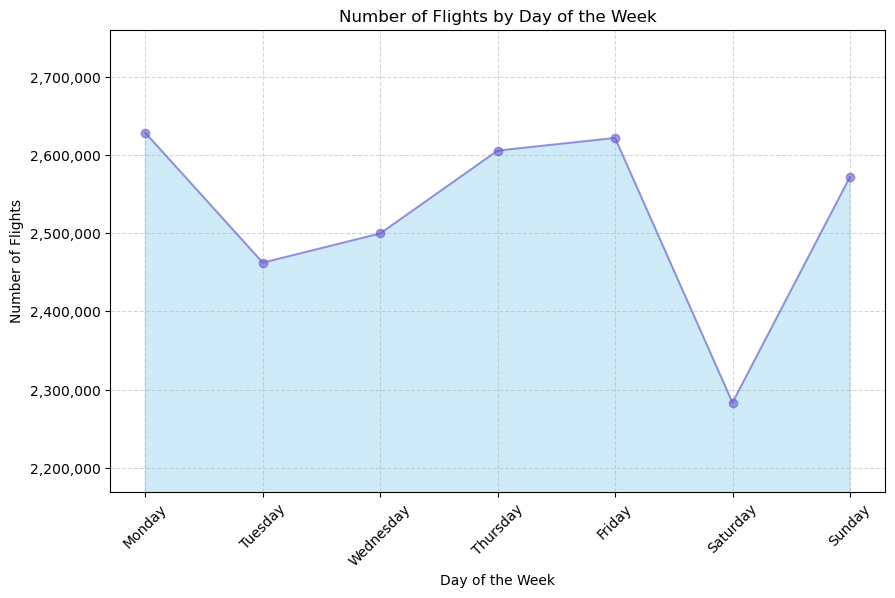

In [84]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.fill_between(flights_by_day_pd['DayOfWeek'], flights_by_day_pd['count'], color="skyblue", alpha=0.4)
plt.plot(flights_by_day_pd['DayOfWeek'], flights_by_day_pd['count'], marker='o', color="Slateblue", alpha=0.6)
plt.title("Number of Flights by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Set y-axis to display in thousands and adjust y-limits for better visualization
plt.gca().get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.ylim(flights_by_day_pd['count'].min() * 0.95, flights_by_day_pd['count'].max() * 1.05)

plt.show()

***Summary***: The area chart indicates that Friday and Monday have the highest number of flights, likely reflecting a pattern where people fly out on Fridays for weekend trips or business travel and return on Sundays or Mondays. This trend suggests that weekend and business travel drive peak flight activity on these days, while Saturday sees a dip in flights as it’s less popular for travel.

##### 3. Which month of the year have the highest/lowest number of flights?

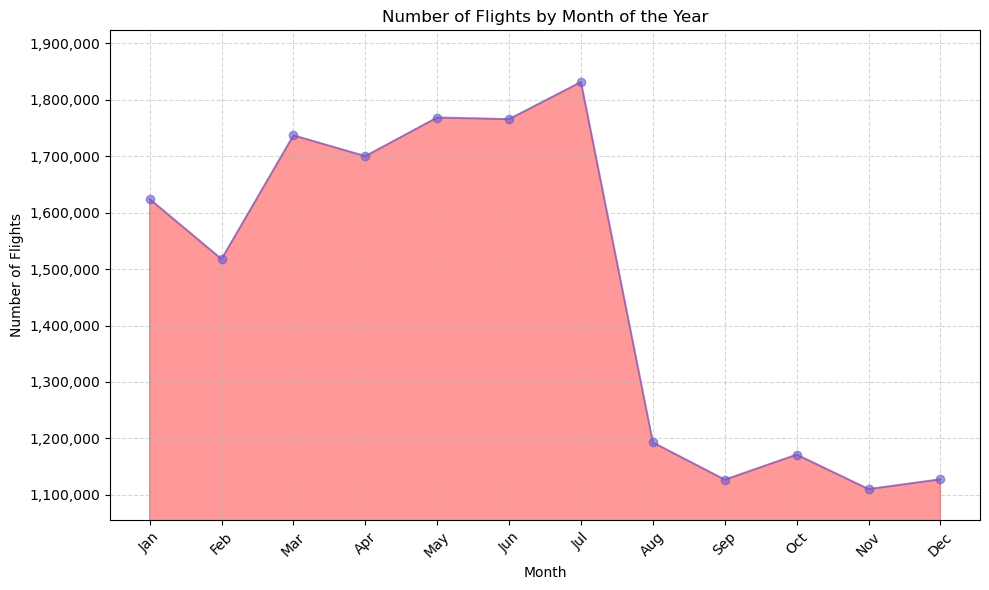

In [85]:
from pyspark.sql.functions import month, count

# Extract month from FL_DATE and count total flights per month
df_monthly_flight_volume = df_cleaned.withColumn("Month", month("FL_DATE"))

# Calculate total flights per month
monthly_flight_volume = df_monthly_flight_volume.groupBy("Month").agg(
    count("FL_DATE").alias("total_flights")  # Count total flights per month
).orderBy("Month")

# Convert to Pandas for easier plotting
monthly_flight_volume_pd = monthly_flight_volume.toPandas()

# Mapping month numbers to names
monthly_flight_volume_pd['Month'] = monthly_flight_volume_pd['Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Now, we can plot
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(10, 6))
plt.fill_between(monthly_flight_volume_pd['Month'], monthly_flight_volume_pd['total_flights'], color="red", alpha=0.4)
plt.plot(monthly_flight_volume_pd['Month'], monthly_flight_volume_pd['total_flights'], marker='o', color="Slateblue", alpha=0.6)
plt.title("Number of Flights by Month of the Year")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Set y-axis to display in thousands and adjust y-limits for better visualization
plt.gca().get_yaxis().set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.ylim(monthly_flight_volume_pd['total_flights'].min() * 0.95, monthly_flight_volume_pd['total_flights'].max() * 1.05)

plt.tight_layout()
plt.show()

***Summary***: The line chart illustrates the monthly flight volume throughout the year. It shows a peak in flight activity during the summer months (particularly around June), followed by a notable decline starting in July, which continues into the fall and winter months. This trend indicates strong seasonal travel patterns, with significant drops in flights during the off-peak months, suggesting potential shifts in demand influenced by holiday travel and weather conditions.

#### II. Flights' Insights

##### 4. How many unique airlines are there in the dataset?

In [13]:
# Count distinct airlines in the main dataset
unique_airline_count = df_cleaned.select("OP_CARRIER_AIRLINE_ID").distinct().count()

print(f"Total unique airlines: {unique_airline_count}")

Total unique airlines: 17


##### 5. How many unique airports are in the dataset?

In [15]:
# Get distinct airport IDs from both origin and destination columns
origin_airports = df_cleaned.select("ORIGIN_AIRPORT_ID").distinct()
destination_airports = df_cleaned.select("DEST_AIRPORT_ID").distinct()

# Union the two to get all unique airport IDs in the dataset
all_airports = origin_airports.union(destination_airports).distinct()

# Count the unique airports
unique_airport_count = all_airports.count()
print(f"Total unique airports: {unique_airport_count}")

Total unique airports: 373


In [18]:
canceled_flights_count = df_cleaned.filter(col("CANCELLED") != "No").count()

diverted_flights_count = df_cleaned.filter(col("DIVERTED") != "No").count()

print(f"Total canceled flights: {canceled_flights_count}")
print(f"Total diverted flights: {diverted_flights_count}")

Total canceled flights: 336267
Total diverted flights: 43869


##### 6. What is the average distance flown per flight?

In [23]:
from pyspark.sql.functions import avg

# Calculate the average distance
average_distance = df_cleaned.select(round(avg("DISTANCE (miles)"), 2)).first()[0]

print(f"Average distance flown per flight: {average_distance} miles")

Average distance flown per flight: 827.95 miles


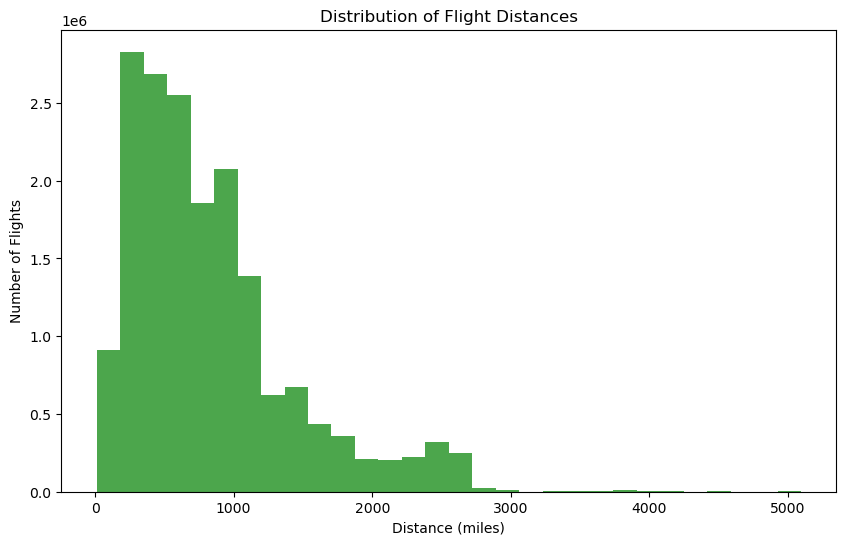

In [20]:
import matplotlib.pyplot as plt
# Convert flight distances to Pandas
distances = df_cleaned.select("DISTANCE (miles)").toPandas()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances["DISTANCE (miles)"], bins=30, color="green", alpha=0.7)
plt.title("Distribution of Flight Distances")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Flights")
plt.show()

***Summary***: The histogram illustrates that the majority of flights cover distances below 1,000 miles, with the frequency significantly declining as the distance increases.

##### 7. How does the average air time compare to average elapsed time flown per flight?

In [36]:
average_air_time = df_cleaned.select(round(avg("AIR_TIME (minutes)"), 2)).first()[0]

average_actual_time = df_cleaned.select(round(avg("ACTUAL_ELAPSED_TIME (minutes)"), 2)).first()[0]

average_crs_time = df_cleaned.select(round(avg("CRS_ELAPSED_TIME (minutes)"), 2)).first()[0]


print(f"Average air time flown per flight: {average_air_time} minutes")
print(f"Average scheduled elapsed time flown per flight: {average_crs_time} minutes")
print(f"Average actual elapsed time flown per flight: {average_actual_time} minutes")


Average air time flown per flight: 114.31 minutes
Average scheduled elapsed time flown per flight: 145.1 minutes
Average actual elapsed time flown per flight: 139.66 minutes


***Note***: Elapsed time is the time duration between departure time and arrival time while air time is the time the plane is actually flying.

##### 8. Airlines with highest average distance flight

In [44]:
# Join df_cleaned with df_airline_cleaned to get airline names
df_with_airline_names = df_cleaned.join(
    df_airline_cleaned,
    df_cleaned["OP_CARRIER_AIRLINE_ID"] == df_airline_cleaned["ID"],
    "inner"
)

# Calculate the average distance by carrier with names and sort from higher to lower
avg_distance_by_carrier = (
    df_with_airline_names.groupBy("OP_CARRIER_AIRLINE_ID", "Name")
    .agg({"DISTANCE (miles)": "avg"})
    .withColumnRenamed("avg(DISTANCE (miles))", "avg_distance")
    .orderBy("avg_distance", ascending=False)
)

# Show the top 5 results
avg_distance_by_carrier.show(5, truncate=False)

+---------------------+----------------------+------------------+
|OP_CARRIER_AIRLINE_ID|Name                  |avg_distance      |
+---------------------+----------------------+------------------+
|19930                |Alaska Airlines Inc.  |1390.0343412358354|
|20409                |JetBlue Airways       |1150.1454030112577|
|19977                |United Air Lines Inc. |1136.4717811944533|
|20416                |Spirit Air Lines      |996.3068903311168 |
|19805                |American Airlines Inc.|972.7261920097164 |
+---------------------+----------------------+------------------+
only showing top 5 rows



***Summary***: The airline with the highest average flight distance is Alaska Airlines Inc., with an average of 1390.03 miles per flight, followed by JetBlue Airways (1150.15 miles), United Air Lines Inc. (1136.47 miles), Spirit Air Lines (996.31 miles), and American Airlines Inc. (972.73 miles).

#####  9. Which airports have the highest number of originating flights and arriving flights?

In [32]:
from pyspark.sql.functions import col

# Count occurrences of each ORIGIN_AIRPORT_ID
origin_counts = df_cleaned.groupBy("ORIGIN_AIRPORT_ID").count()

# Join with df_airport_cleaned to get airport names and locations
origin_airport_details = origin_counts.join(
    df_airport_cleaned,
    origin_counts["ORIGIN_AIRPORT_ID"] == df_airport_cleaned["ID"],
    "inner"
).select("ORIGIN_AIRPORT_ID", "Name", "Location", "State", "count") \
 .orderBy(col("count").desc())

# Show the top results
origin_airport_details.show(10, truncate=False)  # Show top 10 airports with the highest originating flights

+-----------------+----------------------------------------+---------------------+-----+------+
|ORIGIN_AIRPORT_ID|Name                                    |Location             |State|count |
+-----------------+----------------------------------------+---------------------+-----+------+
|10397            |Hartsfield-Jackson Atlanta International|Atlanta, GA          |GA   |851706|
|11298            |Dallas/Fort Worth International         |Dallas/Fort Worth, TX|TX   |742564|
|11292            |Denver International                    |Denver, CO           |CO   |737559|
|13930            |Chicago O'Hare International            |Chicago, IL          |IL   |678829|
|11057            |Charlotte Douglas International         |Charlotte, NC        |NC   |511530|
|12892            |Los Angeles International               |Los Angeles, CA      |CA   |497306|
|12889            |Harry Reid International                |Las Vegas, NV        |NV   |475362|
|14107            |Phoenix Sky Harbor In

In [45]:
from pyspark.sql.functions import col

# Count occurrences of each DEST_AIRPORT_ID (arriving flights)
arriving_counts = df_cleaned.groupBy("DEST_AIRPORT_ID").count()

# Join with df_airport_cleaned to get airport names and locations
arriving_airport_details = arriving_counts.join(
    df_airport_cleaned,
    arriving_counts["DEST_AIRPORT_ID"] == df_airport_cleaned["ID"],
    "inner"
).select("DEST_AIRPORT_ID", "Name", "Location", "State", "count") \
 .orderBy(col("count").desc())

# Show the top 10 results with truncate set to False
arriving_airport_details.show(10, truncate=False)

+---------------+----------------------------------------+---------------------+-----+------+
|DEST_AIRPORT_ID|Name                                    |Location             |State|count |
+---------------+----------------------------------------+---------------------+-----+------+
|10397          |Hartsfield-Jackson Atlanta International|Atlanta, GA          |GA   |851604|
|11298          |Dallas/Fort Worth International         |Dallas/Fort Worth, TX|TX   |742527|
|11292          |Denver International                    |Denver, CO           |CO   |737523|
|13930          |Chicago O'Hare International            |Chicago, IL          |IL   |678830|
|11057          |Charlotte Douglas International         |Charlotte, NC        |NC   |511563|
|12892          |Los Angeles International               |Los Angeles, CA      |CA   |497310|
|12889          |Harry Reid International                |Las Vegas, NV        |NV   |475379|
|14107          |Phoenix Sky Harbor International        |Ph

***Summary***: The top 10 airports by the number of originating and arriving flights are identical, with Hartsfield-Jackson Atlanta International leading in both categories. This consistency indicates that these airports serve as major hubs with high traffic volumes for both departures and arrivals.

#### III. Delays Analysis

##### 10. What are the most common causes of flight delays?

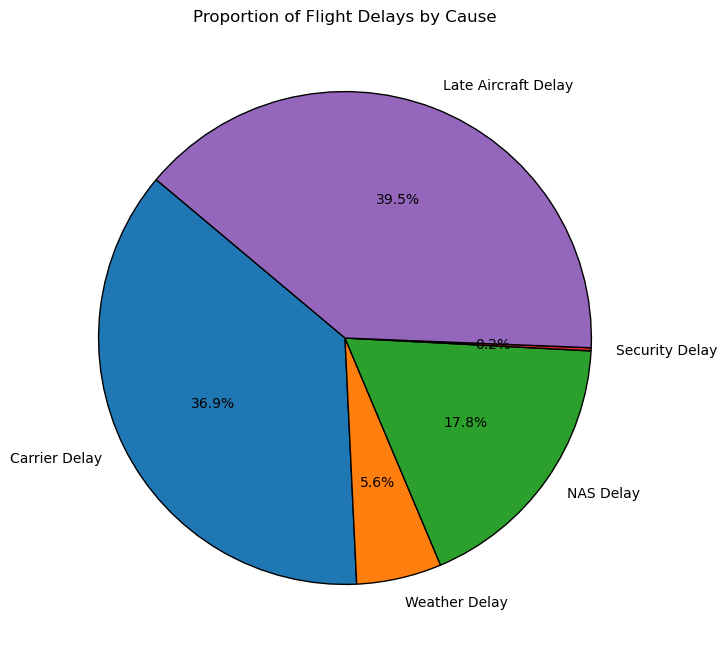

In [ ]:
# Calculate the mean for each delay cause
delay_causes_mean = df_cleaned.agg(
    avg('CARRIER_DELAY').alias('CARRIER_DELAY'),
    avg('WEATHER_DELAY').alias('WEATHER_DELAY'),
    avg('NAS_DELAY').alias('NAS_DELAY'),
    avg('SECURITY_DELAY').alias('SECURITY_DELAY'),
    avg('LATE_AIRCRAFT_DELAY').alias('LATE_AIRCRAFT_DELAY')
).toPandas()

# Extract values for the pie chart
labels = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
sizes = [
    delay_causes_mean['CARRIER_DELAY'][0],
    delay_causes_mean['WEATHER_DELAY'][0],
    delay_causes_mean['NAS_DELAY'][0],
    delay_causes_mean['SECURITY_DELAY'][0],
    delay_causes_mean['LATE_AIRCRAFT_DELAY'][0]
]

# Plotting the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Flight Delays by Cause')
plt.show()


***Summary***: The most common causes of flight delays are Late Aircraft Delay (39.5%) and Carrier Delay (36.9%), with weather delay contributing to 5.6%. Security delay is minimal, accounting for only 0.2%. (Refer to "Proportion of Flight Delays by Cause" chart.)

##### 11. What is the average delay per hour of the day?

In [21]:
from pyspark.sql.functions import hour, avg, concat, lit

# Extract the hour from DEP_TIME and create bins in the format "0-1", "1-2", etc.
df_hourly_delay = df_cleaned.withColumn("DEP_HOUR", hour("DEP_TIME"))
df_hourly_delay = df_hourly_delay.withColumn("Hour_Bin", concat(df_hourly_delay.DEP_HOUR.cast("string"), lit("-"), (df_hourly_delay.DEP_HOUR + 1).cast("string")))

# Calculate the average delay for each hourly bin
avg_delay_per_hour_bin = df_hourly_delay.groupBy("Hour_Bin", "DEP_HOUR").agg(
    avg("CARRIER_DELAY").alias("avg_carrier_delay"),
    avg("WEATHER_DELAY").alias("avg_weather_delay"),
    avg("NAS_DELAY").alias("avg_nas_delay"),
    avg("SECURITY_DELAY").alias("avg_security_delay"),
    avg("LATE_AIRCRAFT_DELAY").alias("avg_late_aircraft_delay")
).orderBy("DEP_HOUR")

# Show the result, dropping the DEP_HOUR column for a cleaner output
avg_delay_per_hour_bin.select("Hour_Bin", "avg_carrier_delay", "avg_weather_delay", "avg_nas_delay", "avg_security_delay", "avg_late_aircraft_delay").show(30, truncate=False)

+--------+------------------+-------------------+------------------+--------------------+-----------------------+
|Hour_Bin|avg_carrier_delay |avg_weather_delay  |avg_nas_delay     |avg_security_delay  |avg_late_aircraft_delay|
+--------+------------------+-------------------+------------------+--------------------+-----------------------+
|null    |22.684931506849313|3.56               |5.22082191780822  |0.3183561643835616  |35.64876712328767      |
|0-1     |5.1597082218393755|0.7353689380887798 |1.0204635704947278|0.015055655340102392|8.465154014393411      |
|1-2     |35.080646794720316|4.841204469500051  |6.268271275697938 |0.19079769098335753 |58.24690274448908      |
|2-3     |43.319172441498445|5.826755046700813  |7.045897358642161 |0.23470924977402832 |68.48739580194838      |
|3-4     |34.994494973671614|4.734561991383437  |5.9715174724748685|0.16969842029679272 |53.7917663954045       |
|4-5     |2.963788883542874 |0.2050080538878313 |0.7678597577557894|0.014120452691253687

***Summary***:The analysis shows that late aircraft delays have the highest average duration, particularly in the early morning hours (0-1 AM and 3-4 AM), likely due to delays carried over from previous days. In contrast, security delays are the lowest on average across all hours, with minimal variation throughout the day.

##### 12. How do scheduled and actual departure/arrival times vary due to delays?

In [ ]:
df_cleaned = df_cleaned.withColumn("CRS_DEP_HOUR", hour(to_timestamp("CRS_DEP_TIME", "HH:mm:ss")))
df_cleaned = df_cleaned.withColumn("CRS_ARR_HOUR", hour(to_timestamp("CRS_ARR_TIME", "HH:mm:ss")))
df_cleaned.select("CRS_DEP_HOUR", "CRS_ARR_HOUR").show(5)

+------------+------------+
|CRS_DEP_HOUR|CRS_ARR_HOUR|
+------------+------------+
|          18|          20|
|          10|          12|
|           6|           9|
|          17|          18|
|           8|          16|
+------------+------------+
only showing top 5 rows



In [ ]:
df_cleaned = df_cleaned.withColumn("DEP_HOUR", hour(to_timestamp("DEP_TIME", "HH:mm:ss")))
df_cleaned = df_cleaned.withColumn("ARR_HOUR", hour(to_timestamp("ARR_TIME", "HH:mm:ss")))
df_cleaned.select("CRS_DEP_HOUR", "CRS_ARR_HOUR").show(5)

+------------+------------+
|CRS_DEP_HOUR|CRS_ARR_HOUR|
+------------+------------+
|          18|          20|
|          10|          12|
|           6|           9|
|          17|          18|
|           8|          16|
+------------+------------+
only showing top 5 rows



In [ ]:
CRS_pdf = df_cleaned.select("CRS_DEP_HOUR", "CRS_ARR_HOUR").toPandas()

In [ ]:
pdf = df_cleaned.select("DEP_HOUR", "ARR_HOUR").toPandas()

In [ ]:
dep_counts = pdf['DEP_HOUR'].value_counts().sort_index()  # Departure counts by hour
arr_counts = pdf['ARR_HOUR'].value_counts().sort_index()

In [ ]:
CRS_dep_counts = CRS_pdf['CRS_DEP_HOUR'].value_counts().sort_index()  # Departure counts by hour
CRS_arr_counts = CRS_pdf['CRS_ARR_HOUR'].value_counts().sort_index()

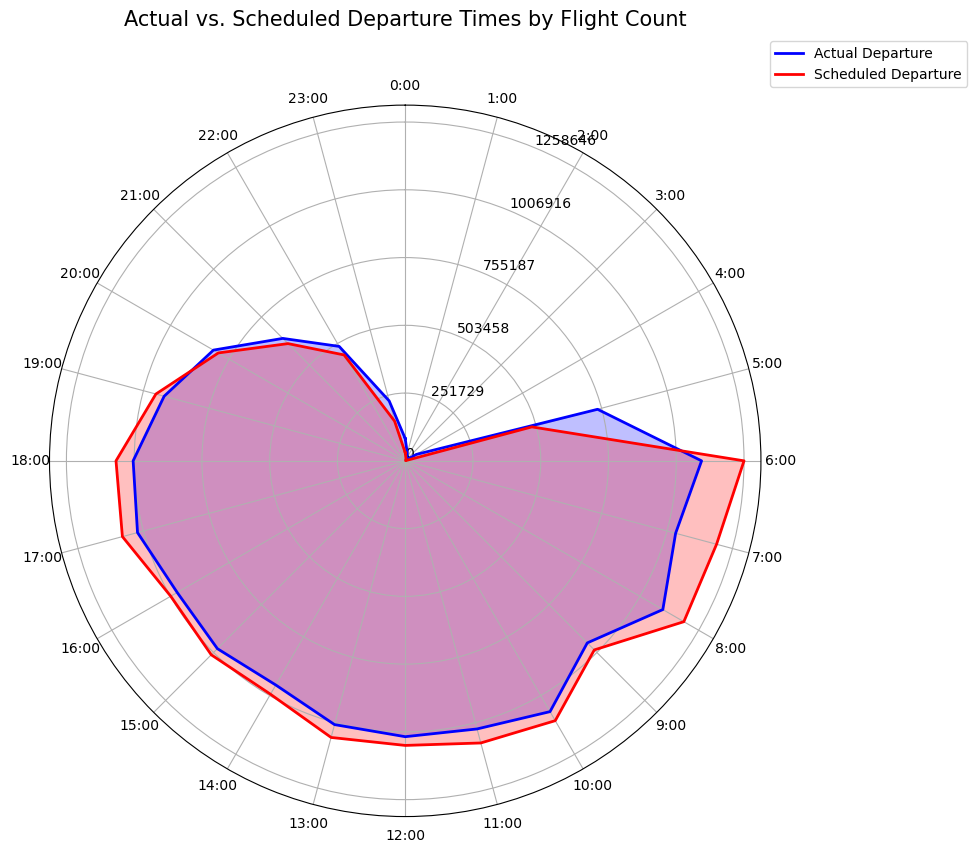

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate the maximum value using NumPy to avoid conflicts
max_dep_count = dep_counts.max() if not dep_counts.empty else 0
max_CRS_dep_count = CRS_dep_counts.max() if not CRS_dep_counts.empty else 0
max_value = np.max([max_dep_count, max_CRS_dep_count]) if (max_dep_count or max_CRS_dep_count) else 1

# Step 2: Normalize the counts
dep_counts_normalized = dep_counts / max_value
CRS_dep_counts_normalized = CRS_dep_counts / max_value

# Step 3: Define the labels and angles for each hour
labels = [f"{int(i)}:00" for i in range(24)]
angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]
angles += angles[:1]  # Complete the loop

# Step 4: Prepare the data for plotting
dep_values = dep_counts_normalized.reindex(range(24), fill_value=0).tolist()
dep_values += dep_values[:1]
CRS_dep_values = CRS_dep_counts_normalized.reindex(range(24), fill_value=0).tolist()
CRS_dep_values += CRS_dep_values[:1]

# Step 5: Initialize the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Step 6: Configure the chart's orientation
ax.set_theta_zero_location("N")  # "0:00" at the top
ax.set_theta_direction(-1)       # Set to clockwise direction

# Step 7: Plot Actual Departure Counts in Red
ax.plot(angles, dep_values, 'blue', linewidth=2, label="Actual Departure")
ax.fill(angles, dep_values, 'blue', alpha=0.25)

# Step 8: Plot Scheduled Departure Counts in Blue
ax.plot(angles, CRS_dep_values, 'red', linewidth=2, label="Scheduled Departure")
ax.fill(angles, CRS_dep_values, 'red', alpha=0.25)

# Step 9: Add labels, title, and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Adding radial labels for each circle, representing percentages of the maximum count
radial_labels = [f"{int(x*max_value)}" for x in np.linspace(0, 1, 6)]
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels(radial_labels)

ax.set_title("Actual vs. Scheduled Departure Times by Flight Count", size=15, y=1.1)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Step 10: Display the plot
plt.tight_layout()
plt.show()

***Summary***: There are notable discrepancies between scheduled and actual departure times, especially during early morning hours. The actual departure time shows delays peaking between 3:00 AM and 6:00 AM, suggesting a significant impact of delays on morning flights. (Refer to "Scheduled vs. Actual Departure Times by Flight Count" radar chart.)

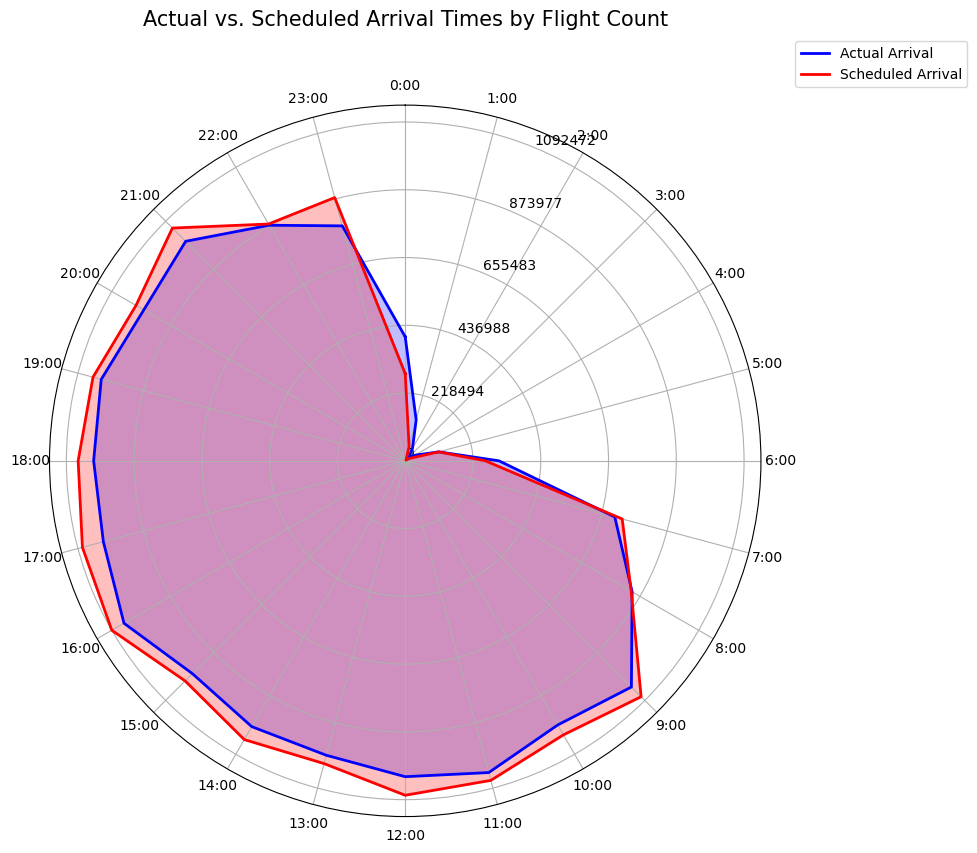

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate the maximum value using NumPy to avoid conflicts
max_arr_count = arr_counts.max() if not arr_counts.empty else 0
max_CRS_arr_count = CRS_arr_counts.max() if not CRS_arr_counts.empty else 0
max_value = np.max([max_arr_count, max_CRS_arr_count]) if (max_arr_count or max_CRS_arr_count) else 1

# Step 2: Normalize the counts
arr_counts_normalized = arr_counts / max_value
CRS_arr_counts_normalized = CRS_arr_counts / max_value

# Step 3: Define the labels and angles for each hour
labels = [f"{int(i)}:00" for i in range(24)]
angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]
angles += angles[:1]  # Complete the loop

# Step 4: Prepare the data for plotting
arr_values = arr_counts_normalized.reindex(range(24), fill_value=0).tolist()
arr_values += arr_values[:1]
CRS_arr_values = CRS_arr_counts_normalized.reindex(range(24), fill_value=0).tolist()
CRS_arr_values += CRS_arr_values[:1]

# Step 5: Initialize the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Step 6: Configure the chart's orientation
ax.set_theta_zero_location("N")  # "0:00" at the top
ax.set_theta_direction(-1)       # Set to clockwise direction

# Step 7: Plot Actual Arrival Counts in Red
ax.plot(angles, arr_values, 'blue', linewidth=2, label="Actual Arrival")
ax.fill(angles, arr_values, 'blue', alpha=0.25)

# Step 8: Plot Scheduled Arrival Counts in Blue
ax.plot(angles, CRS_arr_values, 'red', linewidth=2, label="Scheduled Arrival")
ax.fill(angles, CRS_arr_values, 'red', alpha=0.25)

# Step 9: Add labels, title, and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Adding radial labels for each circle, representing percentages of the maximum count
radial_labels = [f"{int(x*max_value)}" for x in np.linspace(0, 1, 6)]
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels(radial_labels)

ax.set_title("Actual vs. Scheduled Arrival Times by Flight Count", size=15, y=1.1)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

# Step 10: Display the plot
plt.tight_layout()
plt.show()


***Summary***: Similar to departures, the actual arrival times show discrepancies compared to the scheduled times, with major delays noted during peak times. The evening hours, especially around 9:00 PM, exhibit noticeable delays in actual arrivals. (Refer to "Scheduled vs. Actual Arrival Times by Flight Count" radar chart.)

##### 13. Monthly Delay Patterns

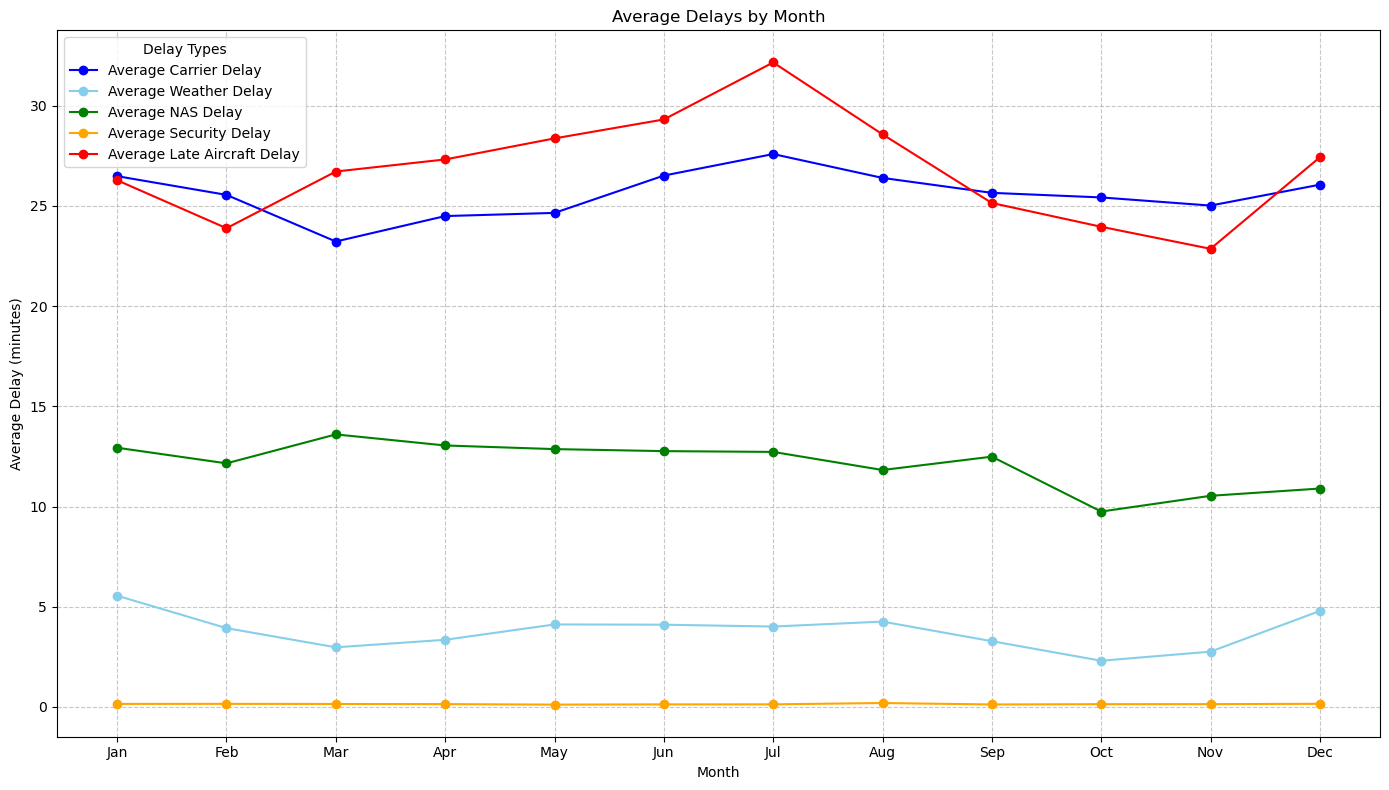

In [65]:
from pyspark.sql.functions import month, avg

# Extract month from FL_DATE
df_monthly_delays = df_cleaned.withColumn("Month", month("FL_DATE"))

# Calculate average delays per month for all delay types
monthly_delays = df_monthly_delays.groupBy("Month").agg(
    avg("CARRIER_DELAY").alias("avg_carrier_delay"),
    avg("WEATHER_DELAY").alias("avg_weather_delay"),
    avg("NAS_DELAY").alias("avg_nas_delay"),
    avg("SECURITY_DELAY").alias("avg_security_delay"),
    avg("LATE_AIRCRAFT_DELAY").alias("avg_late_aircraft_delay")
).orderBy("Month")

# Convert to Pandas for easier plotting
monthly_delays_pd = monthly_delays.toPandas()

# Plotting the average delays by month
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot each delay type
plt.plot(monthly_delays_pd['Month'], monthly_delays_pd['avg_carrier_delay'], marker='o', label='Average Carrier Delay', color='blue')
plt.plot(monthly_delays_pd['Month'], monthly_delays_pd['avg_weather_delay'], marker='o', label='Average Weather Delay', color='skyblue')
plt.plot(monthly_delays_pd['Month'], monthly_delays_pd['avg_nas_delay'], marker='o', label='Average NAS Delay', color='green')
plt.plot(monthly_delays_pd['Month'], monthly_delays_pd['avg_security_delay'], marker='o', label='Average Security Delay', color='orange')
plt.plot(monthly_delays_pd['Month'], monthly_delays_pd['avg_late_aircraft_delay'], marker='o', label='Average Late Aircraft Delay', color='red')

# Adding titles and labels
plt.title("Average Delays by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(monthly_delays_pd['Month'], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Delay Types')
plt.tight_layout()
plt.show()


***Note***: 
* Carrier Delay: Caused by airline-related issues such as crew scheduling, maintenance problems, or operational inefficiencies.

* Aircraft Delay: Arises from factors directly affecting the aircraft, including late arrivals from previous flights and mechanical issues.

* National Air System (NAS) Delay: Linked to air traffic control and management inefficiencies, such as congestion or routing changes enforced by air traffic controllers.

* Weather Delay: Results from adverse weather conditions impacting flight operations, such as storms or heavy winds.

* Security Delay: Related to security measures that slow down boarding or other airport processes.

***Summary***: Both average carrier delays and late aircraft delays show similar patterns, peaking in the middle of the year and declining towards the end of the year. This suggests potential operational challenges or increased flight activity during the summer months. Average weather delays remain consistently low throughout the year, with minor fluctuations. This indicates that while weather does impact delays, it may not be a primary cause compared to other factors. The average NAS delays show a slight upward trend, particularly in the middle months, but remain generally low. Security delays are consistently low across all months, indicating that they are not a significant factor affecting overall flight delays.

#### IV. Cancellations Analysis

##### 14. What is the primary reason for flight cancellations?

In [ ]:
# Select the specific columns and convert to pandas
selected_columns_df = df_cleaned.select(
    "CANCELLED",
    "CANCELLATION_REASON",
    "DIVERTED",
    "CRS_ELAPSED_TIME (minutes)"
).limit(3).toPandas()
# Show the result
print(selected_columns_df)

  CANCELLED CANCELLATION_REASON DIVERTED  CRS_ELAPSED_TIME (minutes)
0        No       Not Cancelled       No                       245.0
1        No       Not Cancelled       No                        89.0
2        No       Not Cancelled       No                        68.0


In [ ]:
# Group by CANCELLED and CANCELLATION_REASON, then count the occurrences
cancellation_counts = df_cleaned.groupBy("CANCELLED", "CANCELLATION_REASON").count()

# Filter for cancellations and order by count in descending order
cancellation_counts = cancellation_counts.filter(df_cleaned["CANCELLED"] == "Yes").orderBy("count", ascending=False)

# Show the result
cancellation_counts.show()

+---------+-------------------+------+
|CANCELLED|CANCELLATION_REASON| count|
+---------+-------------------+------+
|      Yes|            Weather|175156|
|      Yes|            Carrier|122958|
|      Yes|National Air System| 36915|
|      Yes|           Security|  1238|
+---------+-------------------+------+



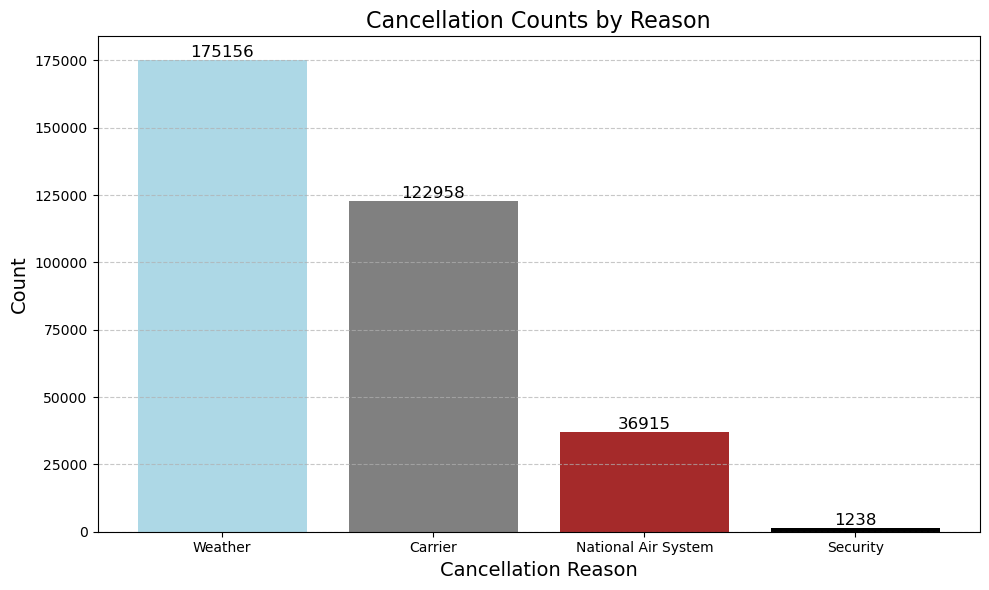

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
cancellation_counts_pd = cancellation_counts.toPandas()

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Define colors for each cancellation reason
color_map = {
    "Weather": "lightblue",
    "Carrier": "gray",
    "National Air System": "brown",
    "Security": "black"
}

# Map the colors to the cancellation reasons
cancellation_counts_pd['color'] = cancellation_counts_pd['CANCELLATION_REASON'].map(color_map)

# Create a vertical bar plot for the cancellation reasons
bars = plt.bar(cancellation_counts_pd['CANCELLATION_REASON'], cancellation_counts_pd['count'], color=cancellation_counts_pd['color'])

# Set title and labels
plt.title('Cancellation Counts by Reason', fontsize=16)
plt.xlabel('Cancellation Reason', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add data labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Ensure x-axis labels are horizontal
plt.xticks(rotation=0)

# Show gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


***Summary***: The primary reason for flight cancellations is weather, accounting for 175,156 cancellations. This is significantly higher compared to cancellations due to carrier issues (122,958), national air system (36,915), and security (1,238). (Refer to "Cancellation Counts by Reason" chart.)

##### 15. Which airlines are most impacted by weather-related cancellations?

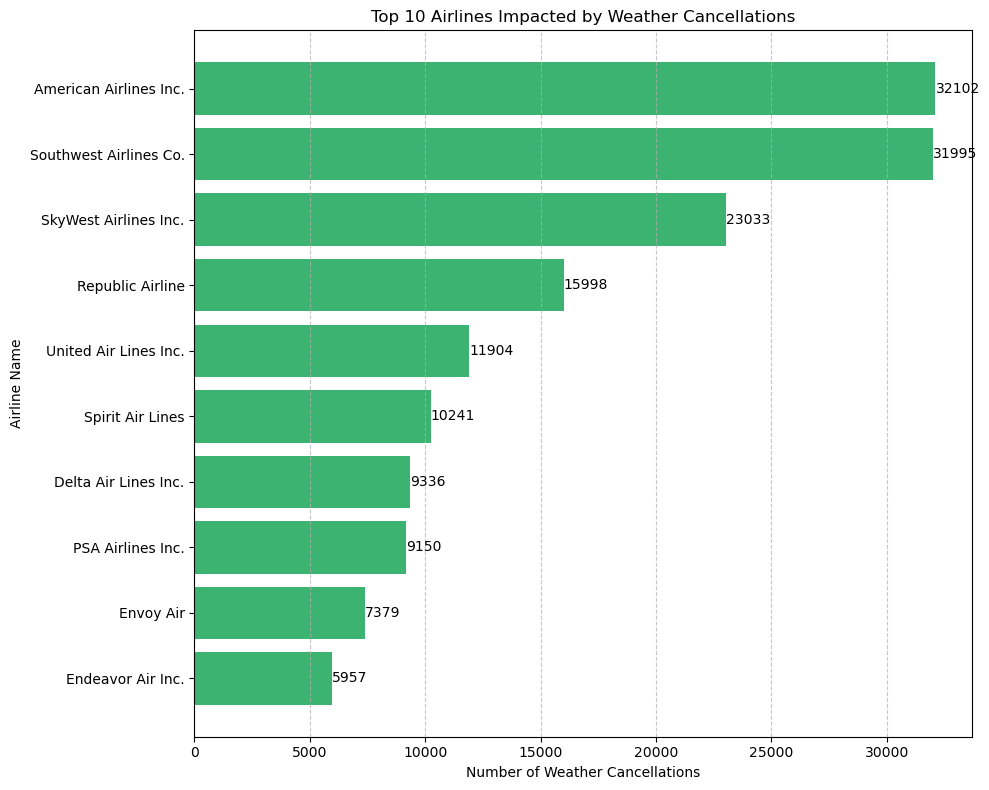

In [ ]:
# Part 2: Top 10 Airlines Impacted by Weather Cancellations
# Airline ID dataframe
airline_id = spark.read.csv(lookup_path + "L_AIRLINE_ID.csv", header=True, inferSchema=True)

# Rename 'Code' column to 'ID' and trim spaces
df_airline_cleaned = airline_id.withColumnRenamed("Code", "ID") \
    .withColumn("Description", trim(airline_id["Description"]))

# Split the 'Description' column into Name and Code
df_airline_cleaned = df_airline_cleaned.withColumn("Name", trim(split(df_airline_cleaned["Description"], ":")[0])) \
    .withColumn("Code", trim(split(df_airline_cleaned["Description"], ":")[1])) \
    .select("ID", "Code", "Name")

# Join with airline lookup table
weather_cancelled_flights = weather_cancelled_flights.drop("Airline_Name").join(df_airline_cleaned.withColumnRenamed("Name", "Airline_Name"), weather_cancelled_flights.OP_CARRIER_AIRLINE_ID == df_airline_cleaned.ID, "left")

# Group by airline and count the number of weather cancellations
weather_cancellations_by_airline = weather_cancelled_flights.groupBy("Airline_Name") \
    .count() \
    .orderBy(col("count").desc())

# Get the top 10 airlines impacted by weather cancellations
top_10_weather_impacted_airlines = weather_cancellations_by_airline.limit(10).toPandas()

# Visualization of the top 10 airlines impacted by weather cancellations
plt.figure(figsize=(10, 8))
bars = plt.barh(top_10_weather_impacted_airlines['Airline_Name'], top_10_weather_impacted_airlines['count'], color='mediumseagreen')
plt.gca().invert_yaxis()  # Higher values on top
plt.xlabel('Number of Weather Cancellations')
plt.ylabel('Airline Name')
plt.title('Top 10 Airlines Impacted by Weather Cancellations')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()

***Summary***: American Airlines and Southwest Airlines experienced the highest number of weather-related cancellations, with 32,102 and 31,995 cancellations respectively. This suggests a need for improved strategies to handle adverse weather. (Refer to "Top 10 Airlines Impacted by Weather Cancellations" chart.)

##### 16. Which airports are most impacted by weather-related cancellations?

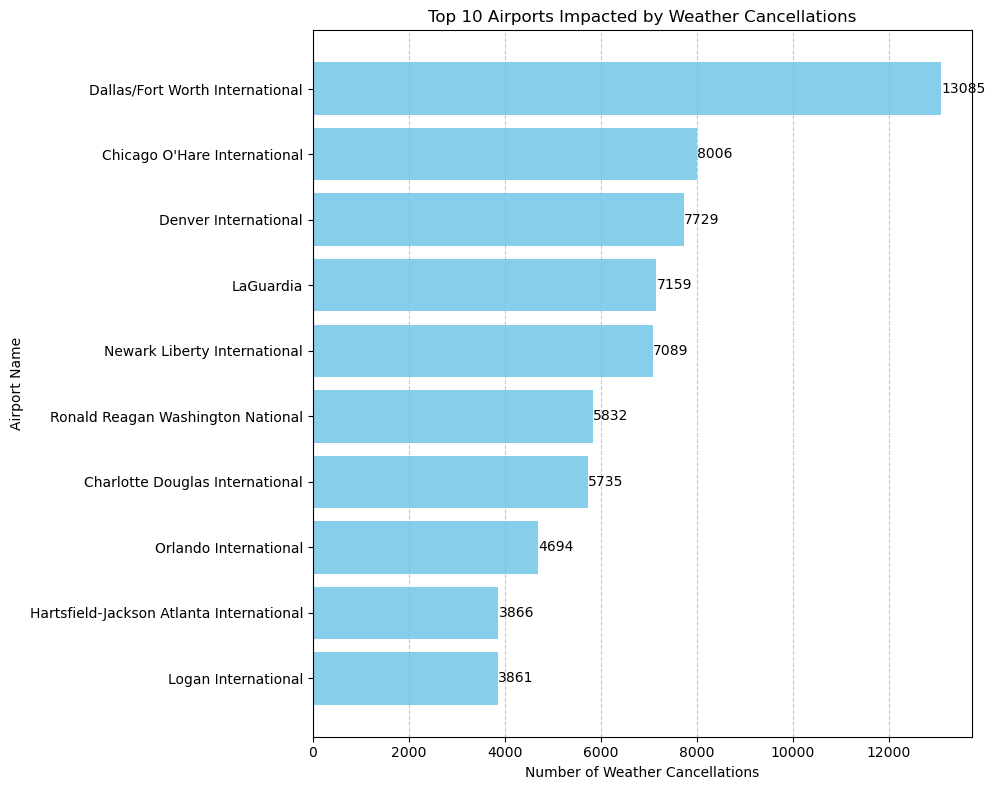

In [7]:
#Top 10 Airports Impacted by Weather Cancellations
from pyspark.sql.functions import col, trim, split
import matplotlib.pyplot as plt
import pandas as pd

# Define cancellation reason mapping
cancellation_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Load Lookup Tables
lookup_path = "gs://qst843-03/lookup_tables/"

# Airport ID dataframe
airport_id = spark.read.csv(lookup_path + "L_AIRPORT_ID.csv", header=True, inferSchema=True)

# Split the 'Description' column into Name and Location
df_airport_cleaned = airport_id.withColumn("Location", trim(split(airport_id["Description"], ":")[0])) \
    .withColumn("Name", trim(split(airport_id["Description"], ":")[1])) \
    .select("Code", "Name", "Location")  # Select only the required columns

# Rename 'Code' to 'ID'
df_airport_cleaned = df_airport_cleaned.withColumnRenamed("Code", "ID")

# Extract State from Location
df_airport_cleaned = df_airport_cleaned.withColumn("State", trim(split(df_airport_cleaned["Location"], ",")[1]))

# Show the DataFrame with the desired column order
df_airport_cleaned = df_airport_cleaned.select("ID", "Name", "Location", "State")

# Filter to include only canceled flights due to weather
weather_cancelled_flights = df_cleaned.filter(col("CANCELLATION_REASON") == cancellation_mapping['B'])

# Join with airport lookup table
weather_cancelled_flights = weather_cancelled_flights.join(df_airport_cleaned.withColumnRenamed("Name", "Airport_Name"), weather_cancelled_flights.ORIGIN_AIRPORT_ID == df_airport_cleaned.ID, "left")

# Group by origin airport and count the number of weather cancellations
weather_cancellations_by_airport = weather_cancelled_flights.groupBy("Airport_Name") \
    .count() \
    .orderBy(col("count").desc())

# Get the top 10 airports impacted by weather cancellations
top_10_weather_impacted_airports = weather_cancellations_by_airport.limit(10).toPandas()

# Visualization of the top 10 airports impacted by weather cancellations
plt.figure(figsize=(10, 8))
bars = plt.barh(top_10_weather_impacted_airports['Airport_Name'], top_10_weather_impacted_airports['count'], color='skyblue')
plt.gca().invert_yaxis()  # Higher values on top
plt.xlabel('Number of Weather Cancellations')
plt.ylabel('Airport Name')
plt.title('Top 10 Airports Impacted by Weather Cancellations')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()

***Summary***: The airports most impacted by weather-related cancellations include Dallas/Fort Worth International (13,085 cancellations) and Chicago O'Hare International (8,006 cancellations), indicating that these hubs are particularly vulnerable to weather disruptions. (Refer to "Top 10 Airports Impacted by Weather Cancellations" chart.).

***Note***: The visualization above highlights the top 10 airports most impacted by weather-related flight cancellations. These airports—such as Dallas/Fort Worth International, Chicago O'Hare International, and Denver International—are at the forefront of disruptions caused by adverse weather conditions.

Given their high susceptibility to weather-related cancellations, we are focusing our machine learning analysis specifically on flights originating or destined for these 10 airports. The objective is to predict cancellation patterns by leveraging flight and weather data, thereby enabling airlines to proactively manage operations and reduce the impact of weather-related disruptions at these critical hubs.

### B. Exploration of Weather Data

#### Loading the Daily Weather Data stored on GCP using Big Query

In [28]:
%%bigquery

SELECT * FROM fall24-qstba843-team-03.airlines.Weather_Daily

Query is running:   0%|          |

Downloading:   0%|          |

,STATION,NAME,DATE,Average Daily Wind Speed,Precipitation,SNOW,Average Temperature,Fastest 2-minute wind speed,Fog_ Ice fog_ or freezing fog _may include heavy fog_,Thunder,ICE Pellets_ sleet_ snow pellets,Blowing or drifting snow
0,USW00013881,Charlotte Douglas International,2022-01-13,2.24,0.00,0.0,41,6.9,<NA>,<NA>,<NA>,<NA>
1,USW00013881,Charlotte Douglas International,2022-10-22,3.58,0.00,0.0,54,6.0,<NA>,<NA>,<NA>,<NA>
2,USW00013881,Charlotte Douglas International,2022-12-19,1.79,0.00,0.0,36,6.9,<NA>,<NA>,<NA>,<NA>
3,USW00013881,Charlotte Douglas International,2023-10-11,2.24,0.00,0.0,65,6.9,<NA>,<NA>,<NA>,<NA>
4,USW00013881,Charlotte Douglas International,2023-10-24,2.24,0.00,0.0,55,6.9,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
9125,USW00013743,Ronald Reagan Washington National,2023-12-02,2.91,0.03,0.0,40,8.9,1,<NA>,<NA>,<NA>
9126,USW00013743,Ronald Reagan Washington National,2023-12-25,4.03,0.00,0.0,22,8.9,1,<NA>,<NA>,<NA>
9127,USW00013743,Ronald Reagan Washington National,2024-01-25,3.13,0.10,0.0,52,8.9,1,<NA>,<NA>,<NA>
9128,USW00013743,Ronald Reagan Washington National,2024-03-03,3.80,0.00,0.0,38,8.9,1,<NA>,<NA>,<NA>


#### I. Basic Exploration of Weather Data

#### Examine the Time-Series Data

In [31]:
%%bigquery

SELECT 
    MIN(`DATE`) AS Earliest_Date,
    MAX(`DATE`) AS Latest_Date
FROM fall24-qstba843-team-03.airlines.Weather_Daily

Query is running:   0%|          |

Downloading:   0%|          |

,Earliest_Date,Latest_Date
0,2022-01-01,2024-07-01


#### Exploring the Occurrence of Locations

In [2]:
%%bigquery

WITH RankedLocations AS (
  SELECT 
      `NAME` AS Location,
      COUNT(*) AS Location_Count
  FROM `fall24-qstba843-team-03.airlines.Weather_Daily`
  GROUP BY `NAME`
  ORDER BY Location_Count DESC
)

SELECT 
    ROW_NUMBER() OVER(ORDER BY Location_Count DESC) AS Index,
    Location,
    Location_Count
FROM RankedLocations
ORDER BY Index

Query is running:   0%|          |

Downloading:   0%|          |

,Index,Location,Location_Count
0,1,Charlotte Douglas International,913
1,2,Chicago O'Hare International,913
2,3,Dallas/Fort Worth International,913
3,4,Denver International,913
4,5,Hartsfield-Jackson Atlanta International,913
5,6,LaGuardia,913
6,7,Logan International,913
7,8,Newark Liberty International,913
8,9,Ronald Reagan Washington National,913
9,10,Orlando International,913


#### Finding the Summary Statistics for all Months Except July, 2024

In [10]:
%%bigquery

WITH MonthlyData AS (
  SELECT 
      FORMAT_TIMESTAMP('%Y-%m', DATE(`DATE`)) AS Year_Month,
      AVG(`Average Daily Wind Speed`) AS Average_Wind_Speed,
      AVG(`Precipitation`) AS Average_Precipitation,
      AVG(`SNOW`) AS Average_Snow,
      AVG(`Average Temperature`) AS Average_Temperature
  FROM `fall24-qstba843-team-03.airlines.Weather_Daily`
  WHERE FORMAT_TIMESTAMP('%Y-%m', DATE(`DATE`)) != '2024-07'
  GROUP BY Year_Month
)
SELECT 
    ROW_NUMBER() OVER (ORDER BY Year_Month) AS Index,
    Year_Month,
    Average_Wind_Speed,
    Average_Precipitation,
    Average_Snow,
    Average_Temperature
FROM MonthlyData
ORDER BY Index
LIMIT 30;


Query is running:   0%|          |

Downloading:   0%|          |

,Index,Year_Month,Average_Wind_Speed,Average_Precipitation,Average_Snow,Average_Temperature
0,1,2022-01,10.059613,0.077355,0.372903,36.677419
1,2,2022-02,10.035893,0.096357,0.180714,41.657143
2,3,2022-03,10.641387,0.114645,0.071935,50.541935
3,4,2022-04,10.949767,0.118367,0.001333,57.710000
4,5,2022-05,9.676065,0.110032,0.007419,67.825806
5,6,2022-06,8.682500,0.093400,0.000000,75.993333
6,7,2022-07,8.344871,0.101774,0.000000,80.874194
7,8,2022-08,7.785097,0.126903,0.000000,78.903226
8,9,2022-09,8.246900,0.152500,0.000000,71.953333
9,10,2022-10,8.423968,0.094129,0.000000,59.993548


##### 1. Finding the occurence of Thunder by location, the average precipitation, and total precipitation

In [14]:
%%bigquery

WITH ThunderPrecipitationComparison AS (
    SELECT 
        `NAME` AS Location,
        COUNT(`Thunder`) AS Thunder_Count,
        AVG(`Precipitation`) AS Avg_Precipitation,
        SUM(`Precipitation`) AS Total_Precipitation
    FROM `fall24-qstba843-team-03.airlines.Weather_Daily`
    WHERE `Thunder` IS NOT NULL  -- Only counting rows where Thunder is not null
    GROUP BY Location
)

SELECT 
    Location,
    Thunder_Count,
    Avg_Precipitation,
    Total_Precipitation
FROM ThunderPrecipitationComparison
ORDER BY Thunder_Count DESC;  

Query is running:   0%|          |

Downloading:   0%|          |

,Location,Thunder_Count,Avg_Precipitation,Total_Precipitation
0,Orlando International,258,0.386899,99.82
1,Hartsfield-Jackson Atlanta International,159,0.486604,77.37
2,Dallas/Fort Worth International,150,0.521000,78.15
3,Denver International,140,0.133000,18.62
4,Charlotte Douglas International,125,0.432560,54.07
5,Chicago O'Hare International,109,0.380642,41.49
6,Ronald Reagan Washington National,104,0.359327,37.37
7,Newark Liberty International,96,0.401458,38.54
8,LaGuardia,91,0.554505,50.46
9,Logan International,56,0.446786,25.02


##### 2. Finding the Occurence of fog by location

In [76]:
%%bigquery

SELECT 
    `NAME` AS Location,
    COUNT(CASE WHEN `Fog_ Ice fog_ or freezing fog _may include heavy fog_` IS NOT NULL THEN 1 END) AS Fog_Count,
FROM `fall24-qstba843-team-03.airlines.Weather_Daily`
GROUP BY Location
ORDER BY Fog_Count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Location,Fog_Count
0,Chicago O'Hare International,349
1,Logan International,341
2,Orlando International,341
3,Charlotte Douglas International,339
4,Hartsfield-Jackson Atlanta International,318
5,Newark Liberty International,282
6,Ronald Reagan Washington National,255
7,LaGuardia,254
8,Denver International,223
9,Dallas/Fort Worth International,222


##### 3. Summary Statistics for Each Location

In [11]:
%%bigquery

SELECT 
    `NAME` AS Location,
    AVG(`Average Daily Wind Speed`) AS Average_Wind_Speed,
    AVG(`Precipitation`) AS Average_Precipitation,
    AVG(`SNOW`) AS Average_Snow,
    AVG(`Average Temperature`) AS Average_Temperature
FROM `fall24-qstba843-team-03.airlines.Weather_Daily`
GROUP BY `NAME`
ORDER BY `NAME`;

Query is running:   0%|          |

Downloading:   0%|          |

,Location,Average_Wind_Speed,Average_Precipitation,Average_Snow,Average_Temperature
0,Charlotte Douglas International,6.445115,0.125148,0.004710,62.583790
1,Chicago O'Hare International,9.700964,0.092103,0.080285,52.228916
2,Dallas/Fort Worth International,10.655958,0.103713,0.004929,68.111720
3,Denver International,9.941698,0.043363,0.151260,50.468784
4,Hartsfield-Jackson Atlanta International,8.057842,0.129146,0.000657,64.311062
5,LaGuardia,10.533341,0.141654,0.042278,56.500548
6,Logan International,10.855082,0.120591,0.083023,52.583790
7,Newark Liberty International,9.399748,0.129441,0.035706,57.132530
8,Orlando International,7.771522,0.141533,0.000000,73.685652
9,Ronald Reagan Washington National,8.352311,0.108302,0.023658,58.766703


##### 4. Finding the fastest wind speed and the fastest two minute wind speed in these 5 locations

In [33]:
%%bigquery

WITH MonthlyMaxWind AS (
  SELECT 
      `NAME` AS Location,
      FORMAT_TIMESTAMP('%Y-%m', DATE(`DATE`)) AS Year_Month,
      `Average Daily Wind Speed` AS Wind_Speed,
      `Fastest 2-minute wind speed` AS Fastest_2min_Wind_Speed
  FROM `fall24-qstba843-team-03.airlines.Weather_Daily`
  WHERE `NAME` IN ('Hartsfield-Jackson Atlanta International', 
                   'Dallas/Fort Worth International', 
                   'Denver International', 
                   'Chicago O\'Hare International', 
                   'Logan International')
  AND FORMAT_TIMESTAMP('%Y-%m', DATE(`DATE`)) != '2024-07'
)

SELECT 
    Location,
    Year_Month,
    Wind_Speed AS Fastest_Wind_Speed,
    Fastest_2min_Wind_Speed
FROM (
    SELECT 
        Location,
        Year_Month,
        Wind_Speed,
        Fastest_2min_Wind_Speed,
        ROW_NUMBER() OVER (PARTITION BY Location ORDER BY Wind_Speed DESC) AS Rank
    FROM MonthlyMaxWind
)
WHERE Rank = 1
ORDER BY Location;

Query is running:   0%|          |

Downloading:   0%|          |

,Location,Year_Month,Fastest_Wind_Speed,Fastest_2min_Wind_Speed
0,Chicago O'Hare International,2022-12,21.70,32.0
1,Dallas/Fort Worth International,2022-01,25.50,40.0
2,Denver International,2024-05,23.94,42.9
3,Hartsfield-Jackson Atlanta International,2022-12,21.25,36.0
4,Logan International,2022-12,29.08,45.0


#### Findings

1. The data covers data that is for a length of exactly two and a half years.

2. Snowfall is negligible or nonexistent from May through September.

3. Wind speeds tend to be higher in colder months, peaking in March 2023 (10.64 mph) and April 2022 (10.95 mph).Summer months   generally exhibit lower wind speeds, with the lowest recorded in July 2023 (7.61 mph).

4. Clear variation in summer(June-August) and winter temperatures(Dec-Feb).

5. Orlando International has the highest thunder count (258), reflecting a significantly storm-prone region(The Carribean). It also leads in total precipitation with 99.82 inches with an average of 0.387 inches, aligning with its high thunder count and tropical location.

6. Denver International, despite ranking 4th in the thunder count(140), has notably lower precipitation levels(18.62). This is in line with its location at the cross-roads of the Rockies and the American Southwest.

7. Four out of five locations (Dallas,Chicago, Atlanta, Boston) saw their highest wind events in Winter(December-January), consistent with the experience of flyers during this period.


#### II. Visualizing our Findings base on weather analysis

In [9]:
weather_df.columns

['STATION',
 'NAME',
 'DATE',
 'Average Daily Wind Speed',
 'Precipitation',
 'SNOW',
 'Average Temperature',
 'Fastest 2-minute wind speed',
 'Fog, Ice fog, or freezing fog (may include heavy fog)',
 'Thunder',
 'ICE Pellets, sleet, snow pellets',
 'Blowing or drifting snow']

In [10]:
# Mapping of airport IDs and names
airport_mapping = [
    (10397, "Hartsfield-Jackson Atlanta International"),
    (10721, "Logan International"),
    (11057, "Charlotte Douglas International"),
    (11278, "Ronald Reagan Washington National"),
    (11292, "Denver International"),
    (11298, "Dallas/Fort Worth International"),
    (11618, "Newark Liberty International"),
    (12953, "LaGuardia"),
    (13204, "Orlando International"),
    (13930, "Chicago O'Hare International")
]

# Create a DataFrame for airport mapping
airport_mapping_df = spark.createDataFrame(airport_mapping, ["ID", "Name"])

# Join weather_df with the airport_mapping_df on the NAME column
weather_with_id = weather_df.join(
    airport_mapping_df,
    weather_df["NAME"] == airport_mapping_df["Name"],
    "left"
).select(
    weather_df["*"],  # Keep all columns from weather_df
    airport_mapping_df["ID"]  # Add the ID column
).drop("STATION")

# Show the updated weather DataFrame
weather_with_id.show()

+--------------------+---------+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+-----+
|                NAME|     DATE|Average Daily Wind Speed|Precipitation|SNOW|Average Temperature|Fastest 2-minute wind speed|Fog, Ice fog, or freezing fog (may include heavy fog)|Thunder|ICE Pellets, sleet, snow pellets|Blowing or drifting snow|   ID|
+--------------------+---------+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+-----+
|Charlotte Douglas...| 1/1/2022|                   13.42|         0.13| 0.0|                 69|                       25.9|                                                    1|   null|                            null|                    null|110

In [11]:
from pyspark.sql.functions import col, sum

# Count null values for each column in weather_with_id
null_counts_weather = weather_with_id.select(
    [sum(col(c).isNull().cast("int")).alias(c) for c in weather_with_id.columns]
)

null_counts_weather.show(truncate=False)

+----+----+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+---+
|NAME|DATE|Average Daily Wind Speed|Precipitation|SNOW|Average Temperature|Fastest 2-minute wind speed|Fog, Ice fog, or freezing fog (may include heavy fog)|Thunder|ICE Pellets, sleet, snow pellets|Blowing or drifting snow|ID |
+----+----+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+---+
|0   |0   |0                       |0            |0   |0                  |0                          |6206                                                 |7842   |9035                            |9111                    |0  |
+----+----+------------------------+-------------+----+-------------------+-------------

In [12]:
weather_with_id = weather_with_id.fillna({
    "Average Daily Wind Speed": 0,
    "Precipitation": 0,
    "SNOW": 0,
    "Average Temperature": 0,
    "Fastest 2-minute wind speed": 0,
    "Fog, Ice fog, or freezing fog (may include heavy fog)": 0,
    "Thunder": 0,
    "ICE Pellets, sleet, snow pellets": 0,
    "Blowing or drifting snow": 0
})

In [13]:
# Re-check null counts after cleaning
null_counts_weather_cleaned = weather_with_id.select(
    [sum(col(c).isNull().cast("int")).alias(c) for c in weather_with_id.columns]
)

null_counts_weather_cleaned.show(truncate=False)

+----+----+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+---+
|NAME|DATE|Average Daily Wind Speed|Precipitation|SNOW|Average Temperature|Fastest 2-minute wind speed|Fog, Ice fog, or freezing fog (may include heavy fog)|Thunder|ICE Pellets, sleet, snow pellets|Blowing or drifting snow|ID |
+----+----+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+---+
|0   |0   |0                       |0            |0   |0                  |0                          |0                                                    |0      |0                               |0                       |0  |
+----+----+------------------------+-------------+----+-------------------+-------------

In [14]:
from pyspark.sql.functions import col

# Select relevant columns from weather_with_id for origin
weather_origin = weather_with_id.select(
    col("ID").alias("Origin_ID"),
    col("DATE").alias("Origin_Date"),
    col("Average Daily Wind Speed").alias("origin_Average_Daily_Wind_Speed"),
    col("Precipitation").alias("origin_Precipitation"),
    col("SNOW").alias("origin_SNOW"),
    col("Average Temperature").alias("origin_Average_Temperature"),
    col("Fastest 2-minute wind speed").alias("origin_Fastest_2_minute_wind_speed"),
    col("Fog, Ice fog, or freezing fog (may include heavy fog)").alias("origin_Fog"),
    col("Thunder").alias("origin_Thunder"),
    col("ICE Pellets, sleet, snow pellets").alias("origin_Ice_Pellets"),
    col("Blowing or drifting snow").alias("origin_Blowing_Snow")
)

# Select relevant columns from weather_with_id for destination
weather_dest = weather_with_id.select(
    col("ID").alias("Dest_ID"),
    col("DATE").alias("Dest_Date"),
    col("Average Daily Wind Speed").alias("dest_Average_Daily_Wind_Speed"),
    col("Precipitation").alias("dest_Precipitation"),
    col("SNOW").alias("dest_SNOW"),
    col("Average Temperature").alias("dest_Average_Temperature"),
    col("Fastest 2-minute wind speed").alias("dest_Fastest_2_minute_wind_speed"),
    col("Fog, Ice fog, or freezing fog (may include heavy fog)").alias("dest_Fog"),
    col("Thunder").alias("dest_Thunder"),
    col("ICE Pellets, sleet, snow pellets").alias("dest_Ice_Pellets"),
    col("Blowing or drifting snow").alias("dest_Blowing_Snow")
)

# Join df_cleaned with weather_origin
flights_with_origin_weather = df_cleaned.join(
    weather_origin,
    (df_cleaned["ORIGIN_AIRPORT_ID"] == weather_origin["Origin_ID"]) &
    (df_cleaned["FL_DATE"] == weather_origin["Origin_Date"]),
    "inner"
)

# Join the resulting DataFrame with weather_dest
flights_with_weather = flights_with_origin_weather.join(
    weather_dest,
    (flights_with_origin_weather["DEST_AIRPORT_ID"] == weather_dest["Dest_ID"]) &
    (flights_with_origin_weather["FL_DATE"] == weather_dest["Dest_Date"]),
    "inner"
).select(
    # Flight data columns
    "FL_DATE", "OP_CARRIER_AIRLINE_ID", "TAIL_NUM", "OP_CARRIER_FL_NUM",
    "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID", "CRS_DEP_TIME", "DEP_TIME",
    "CRS_ARR_TIME", "ARR_TIME", "CANCELLED", "CANCELLATION_REASON", "DIVERTED",
    "CRS_ELAPSED_TIME (minutes)", "ACTUAL_ELAPSED_TIME (minutes)",
    "AIR_TIME (minutes)", "FLIGHTS", "DISTANCE (miles)", "CARRIER_DELAY",
    "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "FL_TIME",

    # Weather data for origin
    "origin_Average_Daily_Wind_Speed", "origin_Precipitation", "origin_SNOW",
    "origin_Average_Temperature", "origin_Fastest_2_minute_wind_speed",
    "origin_Fog", "origin_Thunder", "origin_Ice_Pellets", "origin_Blowing_Snow",

    # Weather data for destination
    "dest_Average_Daily_Wind_Speed", "dest_Precipitation", "dest_SNOW",
    "dest_Average_Temperature", "dest_Fastest_2_minute_wind_speed",
    "dest_Fog", "dest_Thunder", "dest_Ice_Pellets", "dest_Blowing_Snow"
)

# Show the resulting DataFrame
flights_with_weather.show()

24/12/03 11:59:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+---------------------+--------+-----------------+-----------------+---------------+------------+--------+------------+--------+---------+-------------------+--------+--------------------------+-----------------------------+------------------+-------+----------------+-------------+-------------+---------+--------------+-------------------+--------+-------------------------------+--------------------+-----------+--------------------------+----------------------------------+----------+--------------+------------------+-------------------+-----------------------------+------------------+---------+------------------------+--------------------------------+--------+------------+----------------+-----------------+
| FL_DATE|OP_CARRIER_AIRLINE_ID|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|DEST_AIRPORT_ID|CRS_DEP_TIME|DEP_TIME|CRS_ARR_TIME|ARR_TIME|CANCELLED|CANCELLATION_REASON|DIVERTED|CRS_ELAPSED_TIME (minutes)|ACTUAL_ELAPSED_TIME (minutes)|AIR_TIME (minutes)|FLIGHTS|DISTANCE (mile

In [15]:
flights_with_weather.cache()

DataFrame[FL_DATE: string, OP_CARRIER_AIRLINE_ID: int, TAIL_NUM: string, OP_CARRIER_FL_NUM: int, ORIGIN_AIRPORT_ID: int, DEST_AIRPORT_ID: int, CRS_DEP_TIME: string, DEP_TIME: string, CRS_ARR_TIME: string, ARR_TIME: string, CANCELLED: string, CANCELLATION_REASON: string, DIVERTED: string, CRS_ELAPSED_TIME (minutes): double, ACTUAL_ELAPSED_TIME (minutes): double, AIR_TIME (minutes): double, FLIGHTS: int, DISTANCE (miles): double, CARRIER_DELAY: double, WEATHER_DELAY: double, NAS_DELAY: double, SECURITY_DELAY: double, LATE_AIRCRAFT_DELAY: double, FL_TIME: string, origin_Average_Daily_Wind_Speed: double, origin_Precipitation: double, origin_SNOW: double, origin_Average_Temperature: int, origin_Fastest_2_minute_wind_speed: double, origin_Fog: int, origin_Thunder: int, origin_Ice_Pellets: int, origin_Blowing_Snow: int, dest_Average_Daily_Wind_Speed: double, dest_Precipitation: double, dest_SNOW: double, dest_Average_Temperature: int, dest_Fastest_2_minute_wind_speed: double, dest_Fog: int, d

In [16]:
# Total number of flights
total_flights = flights_with_weather.count()

# Number of canceled flights
canceled_flights = flights_with_weather.filter(flights_with_weather["CANCELLED"] == "Yes").count()

# Calculate cancellation rate
cancellation_rate = (canceled_flights / total_flights) * 100

# Print results
print(f"Total Flights: {total_flights}")
print(f"Canceled Flights: {canceled_flights}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Total Flights: 1161522
Canceled Flights: 29016
Cancellation Rate: 2.50%


In [17]:
# Filter for rows with severe weather conditions at origin
severe_weather_cancellations = flights_with_weather.filter(
    (flights_with_weather["origin_Precipitation"] > 0) |
    (flights_with_weather["origin_SNOW"] > 0) |
    (flights_with_weather["origin_Fog"] > 0) |
    (flights_with_weather["origin_Thunder"] > 0) |
    (flights_with_weather["origin_Ice_Pellets"] > 0) |
    (flights_with_weather["origin_Blowing_Snow"] > 0)
)

# Group and count severe weather cancellations
severe_weather_analysis = severe_weather_cancellations.groupBy(
    "origin_Precipitation", "origin_SNOW", "origin_Fog", "origin_Thunder", "origin_Ice_Pellets", "origin_Blowing_Snow"
).count().orderBy("count", ascending=False)

# Show results
severe_weather_analysis.show(truncate=False)

+--------------------+-----------+----------+--------------+------------------+-------------------+-----+
|origin_Precipitation|origin_SNOW|origin_Fog|origin_Thunder|origin_Ice_Pellets|origin_Blowing_Snow|count|
+--------------------+-----------+----------+--------------+------------------+-------------------+-----+
|0.0                 |0.0        |1         |0             |0                 |0                  |87698|
|0.0                 |0.0        |0         |1             |0                 |0                  |32074|
|0.01                |0.0        |0         |0             |0                 |0                  |15568|
|0.01                |0.0        |1         |0             |0                 |0                  |12771|
|0.02                |0.0        |0         |0             |0                 |0                  |7254 |
|0.02                |0.0        |1         |0             |0                 |0                  |6928 |
|0.05                |0.0        |1         |0

##### 6. Cancellation Rate by Airport for different Weather Conditions

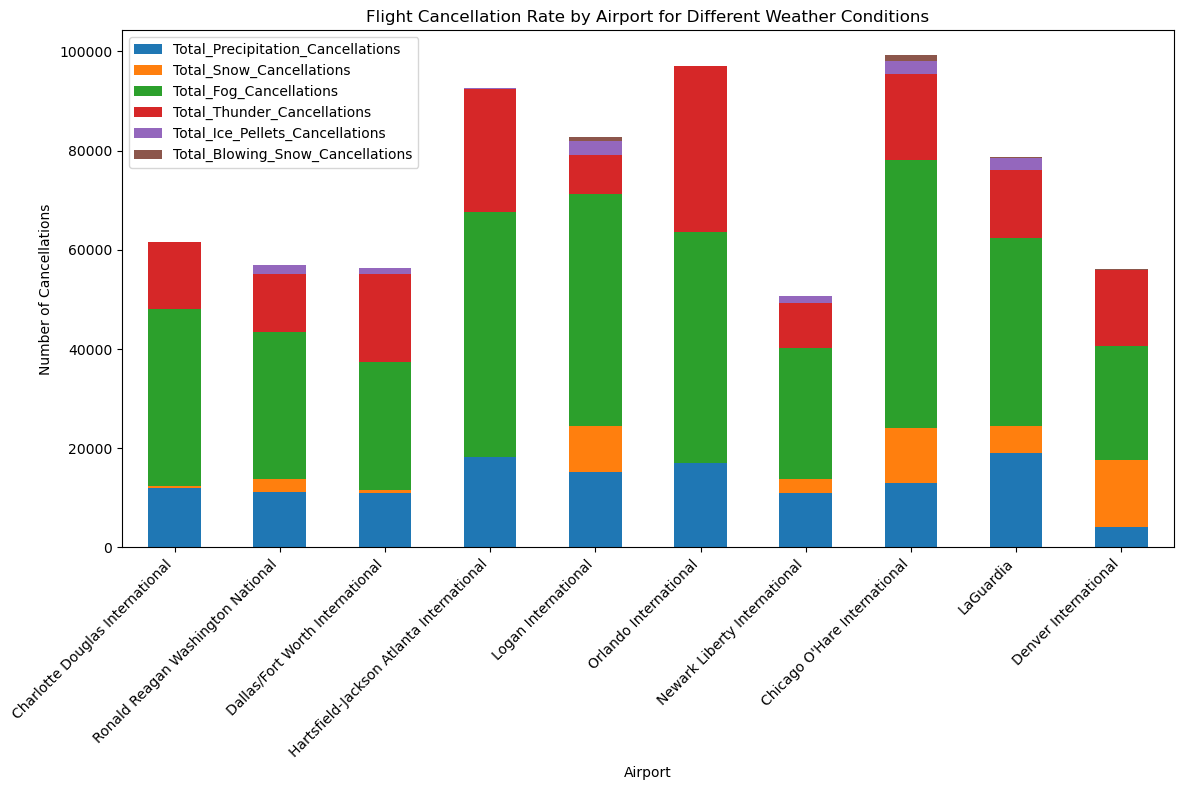

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col, sum as spark_sum, count as spark_count, to_date, date_format, avg
import matplotlib.cm as cm
import numpy as np

# Correct FL_DATE format to extract the month properly
severe_weather_cancellations = severe_weather_cancellations.withColumn("FL_DATE", to_date(col("FL_DATE"), "M/d/yyyy"))

# 1. Flight Cancellation Rate by Airport for Different Weather Conditions
cancellations_by_condition = severe_weather_cancellations.groupBy("ORIGIN_AIRPORT_ID")\
    .agg(
        spark_sum(col("origin_Precipitation")).alias("Total_Precipitation_Cancellations"),
        spark_sum(col("origin_SNOW")).alias("Total_Snow_Cancellations"),
        spark_sum(col("origin_Fog")).alias("Total_Fog_Cancellations"),
        spark_sum(col("origin_Thunder")).alias("Total_Thunder_Cancellations"),
        spark_sum(col("origin_Ice_Pellets")).alias("Total_Ice_Pellets_Cancellations"),
        spark_sum(col("origin_Blowing_Snow")).alias("Total_Blowing_Snow_Cancellations")
    )\
    .join(airport_mapping_df, severe_weather_cancellations["ORIGIN_AIRPORT_ID"] == airport_mapping_df["ID"], "left")\
    .select("Name", "Total_Precipitation_Cancellations", "Total_Snow_Cancellations", "Total_Fog_Cancellations", "Total_Thunder_Cancellations", "Total_Ice_Pellets_Cancellations", "Total_Blowing_Snow_Cancellations")

# Convert to Pandas DataFrame for visualization
cancellations_by_condition_pd = cancellations_by_condition.toPandas()

# Plot
cancellations_by_condition_pd.set_index("Name").plot(kind="bar", stacked=True, figsize=(12, 8))
plt.xticks(rotation=45, ha='right')
plt.xlabel("Airport")
plt.ylabel("Number of Cancellations")
plt.title("Flight Cancellation Rate by Airport for Different Weather Conditions")
plt.tight_layout()
plt.show()

***Summary***: The highest number of flight cancellations is notably at Hartsfield-Jackson Atlanta International, Chicago O'Hare, and Orlando International airports, driven mainly by fog and thunderstorms. Precipitation and snow also contribute to cancellations but vary across different airports.

##### 7. Impact of Average Wind Speed

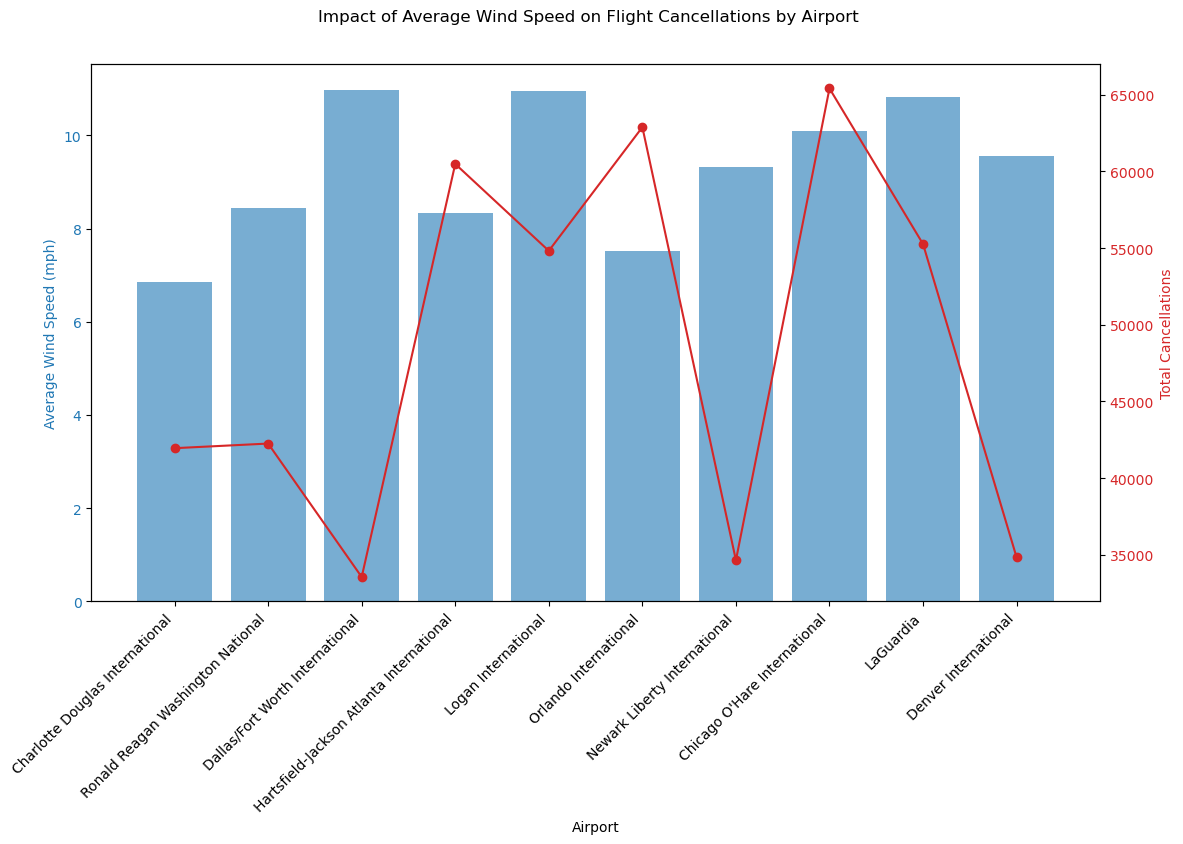

In [19]:
# 2. Impact of Average Wind Speed on Flight Cancellations by Airport
wind_speed_cancelled = severe_weather_cancellations.groupBy("ORIGIN_AIRPORT_ID")\
    .agg(avg(col("origin_Average_Daily_Wind_Speed")).alias("Average_Wind_Speed"),
         spark_count("FL_DATE").alias("Total_Cancellations"))\
    .join(airport_mapping_df, col("ORIGIN_AIRPORT_ID") == airport_mapping_df["ID"], "left")\
    .select("Name", "Average_Wind_Speed", "Total_Cancellations")

# Convert to Pandas DataFrame for visualization
wind_speed_cancelled_pd = wind_speed_cancelled.toPandas()

# Bar plot to show impact of average wind speed on flight cancellations by airport
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel("Airport")
ax1.set_ylabel("Average Wind Speed (mph)", color=color)
ax1.bar(wind_speed_cancelled_pd["Name"], wind_speed_cancelled_pd["Average_Wind_Speed"], alpha=0.6, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Total Cancellations", color=color)
ax2.plot(wind_speed_cancelled_pd["Name"], wind_speed_cancelled_pd["Total_Cancellations"], marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.suptitle("Impact of Average Wind Speed on Flight Cancellations by Airport", y=1.05)
plt.show()

In [20]:
# Calculate correlation between average wind speed and cancellations
cancellations_with_wind_speed = severe_weather_cancellations.withColumn("CANCELLED", when(col("CANCELLED") == "Yes", 1).otherwise(0))
wind_speed_correlation = cancellations_with_wind_speed.stat.corr("origin_Average_Daily_Wind_Speed", "CANCELLED")
print(f"Correlation between Average Wind Speed and Cancellations: {wind_speed_correlation}")

Correlation between Average Wind Speed and Cancellations: 0.08419911743470258


***Summary***: The chart indicates that airports like Logan International and LaGuardia experience high wind speeds and also have significant numbers of cancellations, suggesting some potential impact of wind on cancellations. However, other airports, such as Dallas/Fort Worth, have lower average wind speeds yet still see a high number of cancellations, indicating that factors beyond wind may drive cancellations. Overall, the correlation value of 0.084 suggests that wind speed is not the primary factor influencing cancellations.

##### 8. Impact of Precipitation

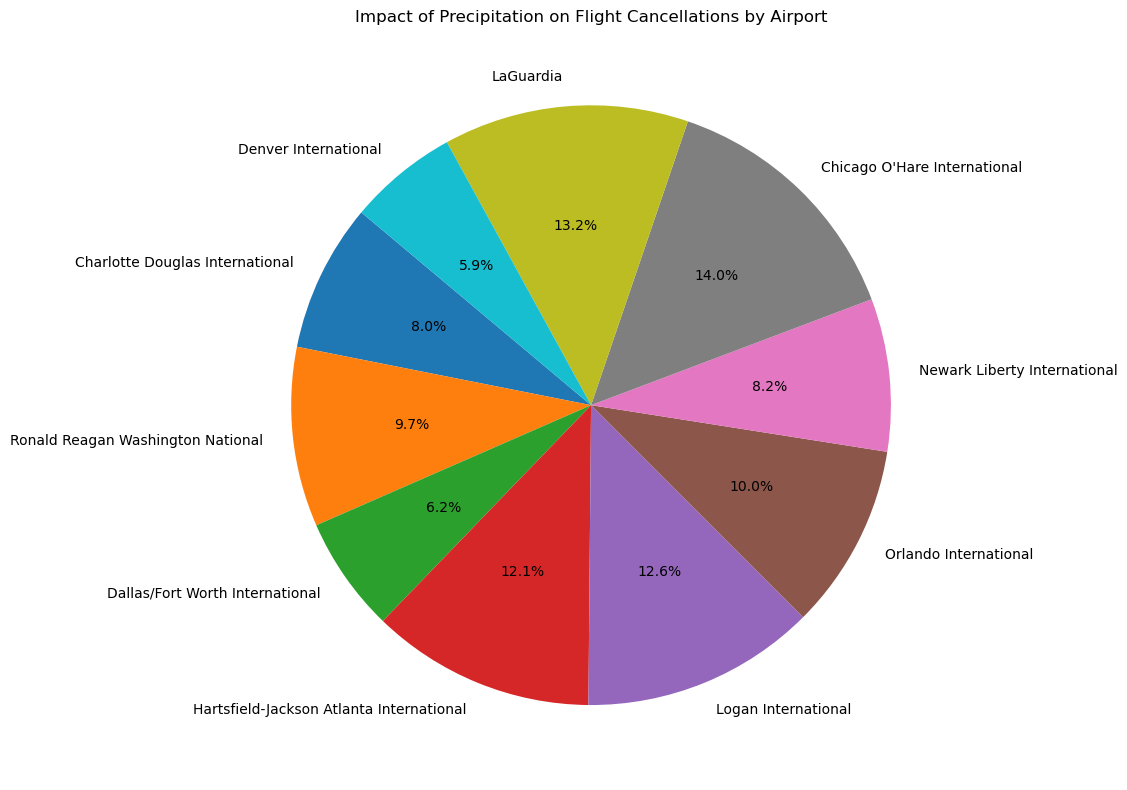

In [21]:
# 3. Impact of Precipitation on Flight Cancellations by Airport
precipitation_cancellations = severe_weather_cancellations.filter(col("origin_Precipitation") > 0)\
    .groupBy("ORIGIN_AIRPORT_ID")\
    .agg(spark_count("FL_DATE").alias("Precipitation_Cancellations"))\
    .join(airport_mapping_df, col("ORIGIN_AIRPORT_ID") == airport_mapping_df["ID"], "left")\
    .select("Name", "Precipitation_Cancellations")

# Convert to Pandas DataFrame for visualization
precipitation_cancellations_pd = precipitation_cancellations.toPandas()

# Plot using a scatter chart instead of a bar chart
plt.figure(figsize=(10, 8))
plt.pie(precipitation_cancellations_pd["Precipitation_Cancellations"], labels=precipitation_cancellations_pd["Name"], autopct='%1.1f%%', startangle=140, colors=cm.get_cmap('tab10').colors)
plt.title("Impact of Precipitation on Flight Cancellations by Airport")
plt.tight_layout()
plt.show()

***Summary***: The pie chart illustrates the share of flight cancellations caused by precipitation across various airports. Chicago O'Hare International has the largest share, accounting for 14% of the cancellations, followed by LaGuardia with 13.2%. Other airports such as Orlando International, Logan International, and Newark Liberty International also have notable contributions to cancellations due to precipitation.

##### 9. Impact of Snow

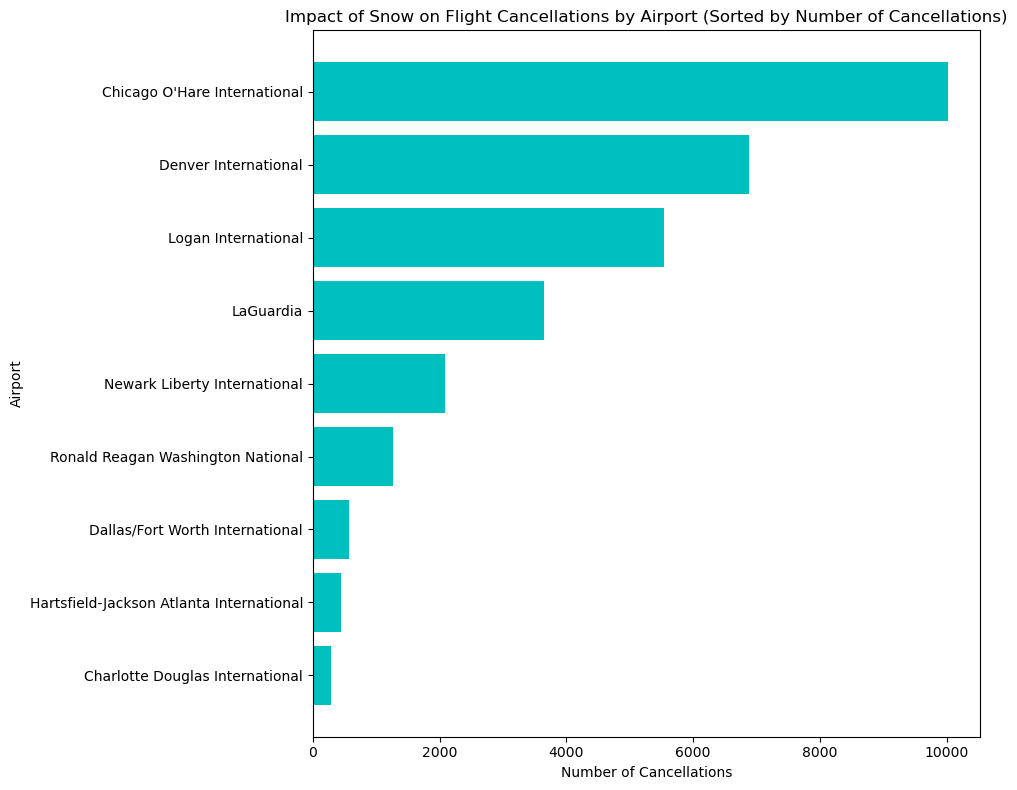

In [22]:
# 4. Impact of Snow on Flight Cancellations by Airport
snow_cancellations = severe_weather_cancellations.filter(col("origin_SNOW") > 0)\
    .groupBy("ORIGIN_AIRPORT_ID")\
    .count()\
    .withColumnRenamed("count", "Snow_Cancellations")\
    .join(airport_mapping_df, severe_weather_cancellations["ORIGIN_AIRPORT_ID"] == airport_mapping_df["ID"], "left")\
    .select("Name", "Snow_Cancellations")

# Convert to Pandas DataFrame for visualization
snow_cancellations_pd = snow_cancellations.toPandas()

# Sort by number of cancellations in ascending order
snow_cancellations_pd = snow_cancellations_pd.sort_values(by="Snow_Cancellations")

# Plot using a horizontal bar chart to show cancellations due to snow by airport
plt.figure(figsize=(10, 8))
plt.barh(snow_cancellations_pd["Name"], snow_cancellations_pd["Snow_Cancellations"], color='c')
plt.xlabel("Number of Cancellations")
plt.ylabel("Airport")
plt.title("Impact of Snow on Flight Cancellations by Airport (Sorted by Number of Cancellations)")
plt.tight_layout()
plt.show()


***Summary***: The horizontal bar chart shows that Chicago O'Hare International has the highest number of flight cancellations due to snow, followed by Denver International and Logan International. In contrast, airports like Charlotte Douglas International and Hartsfield-Jackson Atlanta International have the fewest cancellations attributed to snow.

##### 10. Impact of Fog

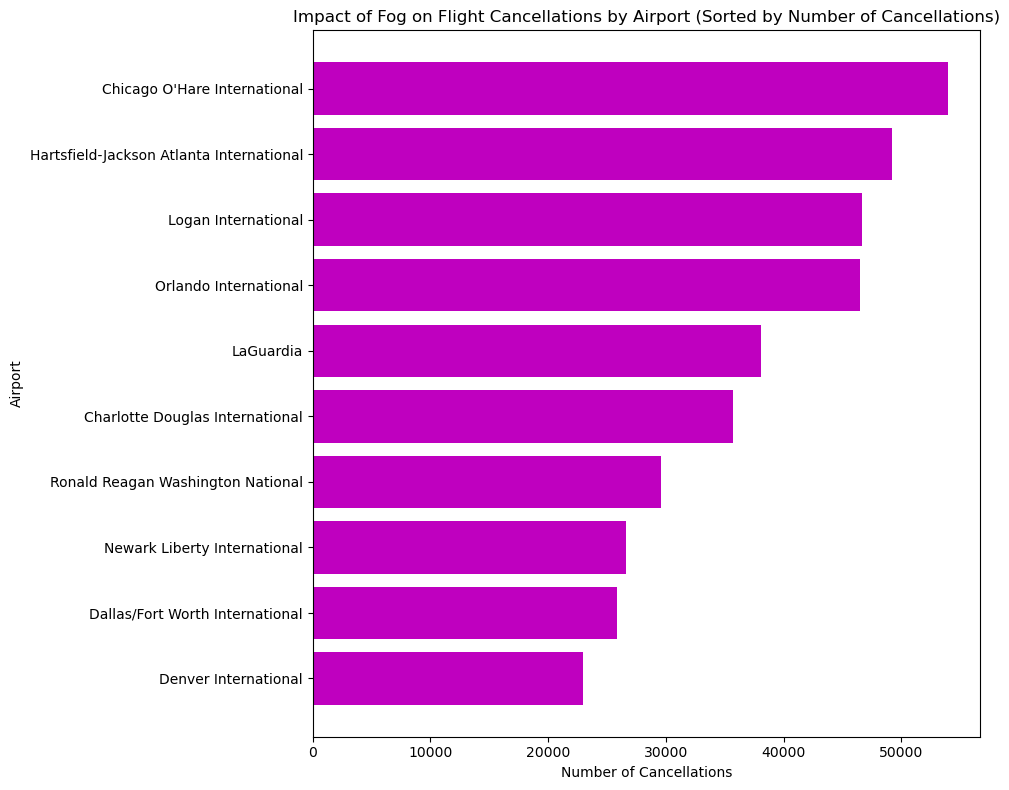

In [23]:
# 5. Cancellations Due to Fog by Airport
cancellations_fog = severe_weather_cancellations.filter(col("origin_Fog") > 0)
fog_cancellations = cancellations_fog.groupBy("ORIGIN_AIRPORT_ID")\
    .agg(spark_count("FL_DATE").alias("Total_Cancellations"))\
    .join(airport_mapping_df, col("ORIGIN_AIRPORT_ID") == airport_mapping_df["ID"], "left")\
    .select("Name", "Total_Cancellations")

# Convert to Pandas DataFrame for visualization
fog_cancellations_pd = fog_cancellations.toPandas()

# Plot using a horizontal bar chart to show cancellations due to fog by airport
plt.figure(figsize=(10, 8))
fog_cancellations_pd_sorted = fog_cancellations_pd.sort_values(by="Total_Cancellations")
plt.barh(fog_cancellations_pd_sorted["Name"], fog_cancellations_pd_sorted["Total_Cancellations"], color='m')
plt.xlabel("Number of Cancellations")
plt.ylabel("Airport")
plt.title("Impact of Fog on Flight Cancellations by Airport (Sorted by Number of Cancellations)")
plt.tight_layout()
plt.show()

***Summary***: The updated chart shows the impact of fog on flight cancellations, sorted by the number of cancellations for each airport. Chicago O'Hare International has the highest number of cancellations due to fog, followed by Hartsfield-Jackson Atlanta International and Logan International. This visualization indicates that certain airports are more significantly affected by fog-related disruptions compared to others.

##### 11. Impact of Thunder

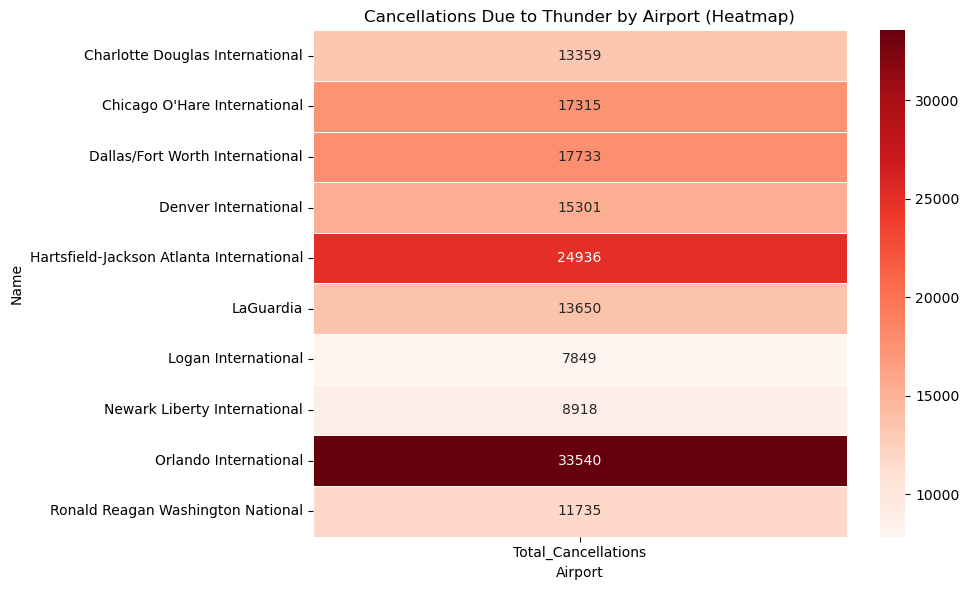

In [24]:
# 6. Cancellations Due to Thunder by Airport
cancellations_thunder = severe_weather_cancellations.filter(col("origin_Thunder") > 0)
thunder_cancellations = cancellations_thunder.groupBy("ORIGIN_AIRPORT_ID")\
    .agg(spark_count("FL_DATE").alias("Total_Cancellations"))\
    .join(airport_mapping_df, col("ORIGIN_AIRPORT_ID") == airport_mapping_df["ID"], "left")\
    .select("Name", "Total_Cancellations")

# Convert to Pandas DataFrame for visualization
thunder_cancellations_pd = thunder_cancellations.toPandas()

# Plot using a bubble chart to show cancellations due to thunder by airport
import seaborn as sns
plt.figure(figsize=(10, 6))
thunder_data = thunder_cancellations_pd.pivot_table(index='Name', values='Total_Cancellations', aggfunc=np.sum).fillna(0)
sns.heatmap(thunder_data, annot=True, fmt='g', cmap='Reds', linewidths=.5)
plt.xlabel("Airport")
plt.title("Cancellations Due to Thunder by Airport (Heatmap)")
plt.tight_layout()
plt.show()

***Summary***: The heatmap reveals that Orlando International Airport had the highest number of cancellations due to thunder, with over 33,000 cancellations, while Logan International and Newark Liberty International had the fewest, both under 10,000.

##### 12. Impact of Ice Pellets

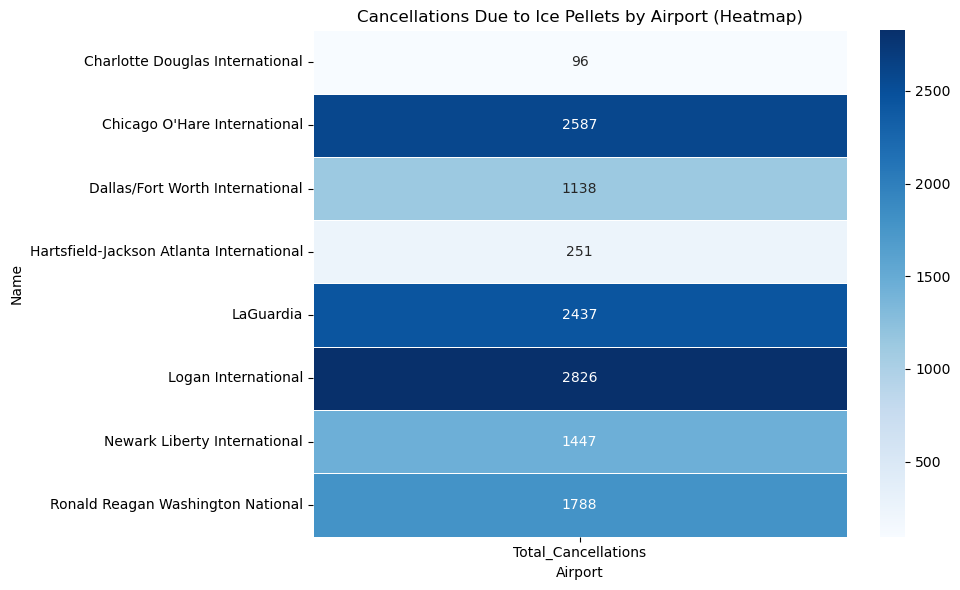

In [26]:
# 7. Cancellations Due to Ice Pellets by Airport
cancellations_ice_pellets = severe_weather_cancellations.filter(col("origin_Ice_Pellets") > 0)
ice_pellets_cancellations = cancellations_ice_pellets.groupBy("ORIGIN_AIRPORT_ID")\
    .agg(spark_count("FL_DATE").alias("Total_Cancellations"))\
    .join(airport_mapping_df, col("ORIGIN_AIRPORT_ID") == airport_mapping_df["ID"], "left")\
    .select("Name", "Total_Cancellations")

# Convert to Pandas DataFrame for visualization
ice_pellets_cancellations_pd = ice_pellets_cancellations.toPandas()

# Plot
plt.figure(figsize=(10, 6))
ice_pellets_data = ice_pellets_cancellations_pd.pivot_table(index='Name', values='Total_Cancellations', aggfunc=np.sum).fillna(0)
sns.heatmap(ice_pellets_data, annot=True, fmt='g', cmap='Blues', linewidths=.5)
plt.xlabel("Airport")
plt.title("Cancellations Due to Ice Pellets by Airport (Heatmap)")
plt.tight_layout()
plt.show()

***Summary***: The heatmap representing cancellations due to thunder by airport indicates that Orlando International had the highest number of cancellations, with over 33,000, while Logan International had the fewest, with just under 8,000.

##### 13. Flight Cancellations Due to Severe Weather by Airport and Month

/tmp/ipykernel_19249/3983808238.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


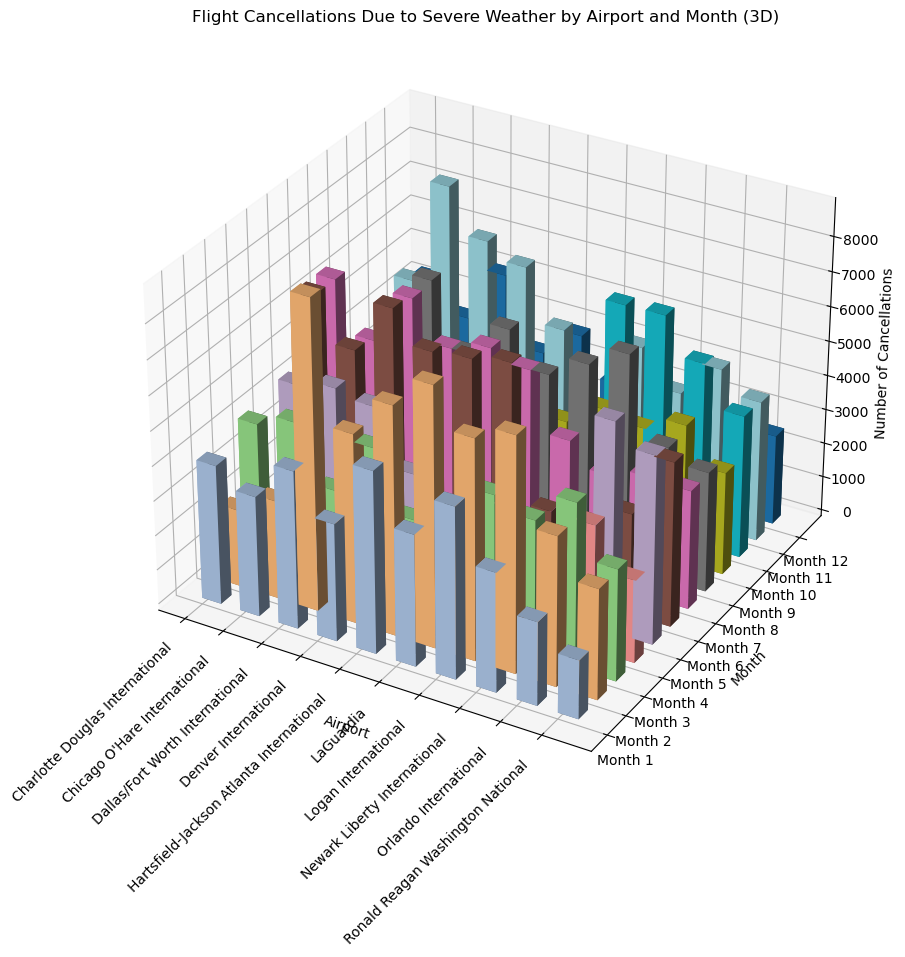

In [27]:
# 8. Flight Cancellations Due to Severe Weather by Airport and Month
cancellations_by_airport_month = severe_weather_cancellations.withColumn("Month", date_format(col("FL_DATE"), "MM").cast("int"))\
    .groupBy("ORIGIN_AIRPORT_ID", "Month")\
    .agg(spark_count("FL_DATE").alias("Total_Cancellations"))\
    .join(airport_mapping_df, col("ORIGIN_AIRPORT_ID") == airport_mapping_df["ID"], "left")\
    .select("Name", "Month", "Total_Cancellations")

# Convert to Pandas DataFrame for visualization
cancellations_by_airport_month_pd = cancellations_by_airport_month.toPandas()

# Pivot the DataFrame to create a matrix of cancellations by airport and month
cancellations_by_airport_month_pivot = cancellations_by_airport_month_pd.pivot(index='Name', columns='Month', values='Total_Cancellations').fillna(0)

# Plot with 12 different colors for each month in a 3D bar chart
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
x_pos = np.arange(len(cancellations_by_airport_month_pivot.index))
y_pos = np.arange(1, 13)
x, y = np.meshgrid(x_pos, y_pos)
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)

values = cancellations_by_airport_month_pivot.values.flatten()
dx = dy = 0.5
dz = values
colors = cm.get_cmap('tab20', 12)
ax.bar3d(x, y, z, dx, dy, dz, color=[colors(i % 12) for i in y])

ax.set_xticks(np.arange(len(cancellations_by_airport_month_pivot.index)))
ax.set_xticklabels(cancellations_by_airport_month_pivot.index, rotation=45, ha='right')
ax.set_yticks(np.arange(1, 13))
ax.set_yticklabels([f"Month {i}" for i in range(1, 13)])
ax.set_xlabel('Airport')
ax.set_ylabel('Month')
ax.set_zlabel('Number of Cancellations')
ax.set_title('Flight Cancellations Due to Severe Weather by Airport and Month (3D)')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

***Summary***: The 3D chart visualizes the number of flight cancellations due to severe weather by airport and month. It allows you to compare which airports and months had higher or lower numbers of cancellations, providing insights into the seasonal patterns of cancellations across different airports. The variation in bar heights and the monthly distribution help highlight airports and periods particularly affected by severe weather.

### C. Predicting Flight Cancellations Using Machine Learning

#### I. Joining Flight Data with Weather Data (Preprocessing)

In [56]:
# Perform the inner join to create the flight_with_weather DataFrame
flight_with_weather = df_cleaned.join(
    weather_with_id,
    (df_cleaned["ORIGIN_AIRPORT_ID"] == weather_with_id["ID"]) &
    (df_cleaned["FL_DATE"] == weather_with_id["DATE"]),
    how="inner"
)

# Verify the result
flight_with_weather.printSchema()
flight_with_weather.show(5)

# Check distinct airports to confirm the join worked as expected
flight_with_weather.select("ORIGIN_AIRPORT_ID").distinct().show()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- CRS_DEP_TIME: string (nullable = true)
 |-- DEP_TIME: string (nullable = true)
 |-- CRS_ARR_TIME: string (nullable = true)
 |-- ARR_TIME: string (nullable = true)
 |-- CANCELLED: string (nullable = true)
 |-- CANCELLATION_REASON: string (nullable = true)
 |-- DIVERTED: string (nullable = true)
 |-- CRS_ELAPSED_TIME (minutes): double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME (minutes): double (nullable = true)
 |-- AIR_TIME (minutes): double (nullable = true)
 |-- FLIGHTS: integer (nullable = true)
 |-- DISTANCE (miles): double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double (nullable = true)
 |-- NAS_DELAY: double (nullable = true)
 |-- SECURITY_DELAY: doubl

+--------+---------------------+--------+-----------------+-----------------+---------------+------------+--------+------------+--------+---------+-------------------+--------+--------------------------+-----------------------------+------------------+-------+----------------+-------------+-------------+---------+--------------+-------------------+--------+--------------------+--------+------------------------+-------------+----+-------------------+---------------------------+-----------------------------------------------------+-------+--------------------------------+------------------------+-----+
| FL_DATE|OP_CARRIER_AIRLINE_ID|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|DEST_AIRPORT_ID|CRS_DEP_TIME|DEP_TIME|CRS_ARR_TIME|ARR_TIME|CANCELLED|CANCELLATION_REASON|DIVERTED|CRS_ELAPSED_TIME (minutes)|ACTUAL_ELAPSED_TIME (minutes)|AIR_TIME (minutes)|FLIGHTS|DISTANCE (miles)|CARRIER_DELAY|WEATHER_DELAY|NAS_DELAY|SECURITY_DELAY|LATE_AIRCRAFT_DELAY| FL_TIME|                NAME|    DATE|Ave

+-----------------+
|ORIGIN_AIRPORT_ID|
+-----------------+
|            11057|
|            11278|
|            11298|
|            10397|
|            10721|
|            13204|
|            11618|
|            13930|
|            12953|
|            11292|
+-----------------+



#### II. Feature Engineering for Machine Learning

##### 1. Extracting Temporal Features
Temporal attributes like the day of the week, month, and hour of departure often influence flight operations. For example, weekends might see different travel patterns compared to weekdays, and weather conditions can vary seasonally.

In [57]:
from pyspark.sql.functions import dayofweek, month, hour

# Extract day of the week
flight_with_weather = flight_with_weather.withColumn("DAY_OF_WEEK", dayofweek("FL_DATE"))

# Extract month
flight_with_weather = flight_with_weather.withColumn("MONTH", month("FL_DATE"))

# Extract hour from scheduled departure time
flight_with_weather = flight_with_weather.withColumn("DEP_HOUR", hour("CRS_DEP_TIME"))

##### 2. Creating an Adverse Weather Flag and a Weather Severity Score
Adverse weather events like fog, precipitation, snow, and thunderstorms are critical contributors to flight cancellations. 

In [58]:
from pyspark.sql.functions import when

# Create adverse weather flag
flight_with_weather = flight_with_weather.withColumn(
    "ADVERSE_WEATHER_FLAG", 
    when(
        (flight_with_weather["Fog, Ice fog, or freezing fog (may include heavy fog)"] > 0) |
        (flight_with_weather["Precipitation"] > 0) |
        (flight_with_weather["SNOW"] > 0) |
        (flight_with_weather["Thunder"] > 0),
        1
    ).otherwise(0)
)

# Create a simple weather severity score
flight_with_weather = flight_with_weather.withColumn(
    "WEATHER_SEVERITY_SCORE", 
    flight_with_weather["Precipitation"] * 2 + 
    flight_with_weather["SNOW"] * 2 + 
    flight_with_weather["Average Daily Wind Speed"]
)

To quantify the severity of weather conditions, we created a WEATHER_SEVERITY_SCORE:

The score is calculated as a weighted combination of:
Precipitation: Weighted by 2 to emphasize its impact.
Snow: Weighted by 2 as well since snow significantly impacts flight operations.
Average Daily Wind Speed: Included directly as wind affects takeoff, landing, and flight safety.
This numerical feature provides the model with a more detailed representation of weather intensity.

##### 3. Creating a Binary Label for Flight Cancellations

In [59]:
from pyspark.sql.functions import col

# Create a binary label for cancellations
flight_with_weather = flight_with_weather.withColumn(
    "CANCELLED_LABEL", 
    when(col("CANCELLED") == "Yes", 1).otherwise(0)
)

##### 4. Exploratory Analysis of Flight Cancellations

Before building a machine learning model, it’s crucial to understand patterns and factors contributing to flight cancellations. The following analyses were conducted to explore the dataset and provide meaningful insights:

In [60]:
# Overall cancellation rate
cancellation_rate = flight_with_weather.filter(col("CANCELLED_LABEL") == 1).count() / flight_with_weather.count()
print(f"Overall cancellation rate: {cancellation_rate:.2%}")

# Cancellations by day of the week
flight_with_weather.groupBy("DAY_OF_WEEK").agg({"CANCELLED_LABEL": "avg"}).show()

# Cancellations by hour of the day
flight_with_weather.groupBy("DEP_HOUR").agg({"CANCELLED_LABEL": "avg"}).show()

Overall cancellation rate: 2.11%


+-----------+--------------------+
|DAY_OF_WEEK|avg(CANCELLED_LABEL)|
+-----------+--------------------+
|       null|0.021136670970502175|
+-----------+--------------------+



+--------+--------------------+
|DEP_HOUR|avg(CANCELLED_LABEL)|
+--------+--------------------+
|      12|0.017343282479406006|
|      22|0.027612411552307602|
|       1|0.019169329073482427|
|      13|0.016414011044883527|
|       6|0.022525318893445407|
|      16|0.023620382985780296|
|      20|0.029651794610899215|
|       5| 0.02014346362172449|
|      19|0.027804138276155632|
|      15|0.020722269705445124|
|       9|0.015498201050994814|
|      17| 0.02456491298259652|
|       8|0.016541838399166696|
|      23|0.023689905704127375|
|       7| 0.01807817066512509|
|      10| 0.01635445151010188|
|      21|0.030271043312448925|
|      11| 0.01395457290277836|
|      14|0.019492327452173327|
|       0|0.015887509130752375|
+--------+--------------------+
only showing top 20 rows



- This indicates that a small fraction of flights in the dataset were canceled, highlighting a significant class imbalance.
This low rate suggests that most flights are successfully completed, making it critical to focus on accurately identifying the rare cancellations.
- There are no major spikes or anomalies across specific days of the week.
Day of the week may have minimal influence on flight cancellations in this dataset.
- Flights scheduled later in the evening (e.g., 10 PM) have a higher likelihood of being canceled.
This might be due to compounding delays throughout the day or lower operational flexibility at night.

In [41]:
# Average weather severity score for canceled and non-canceled flights
flight_with_weather.groupBy("CANCELLED_LABEL").agg({"WEATHER_SEVERITY_SCORE": "avg"}).show()

# Cancellations by adverse weather flag
flight_with_weather.groupBy("ADVERSE_WEATHER_FLAG").agg({"CANCELLED_LABEL": "avg"}).show()

+---------------+---------------------------+
|CANCELLED_LABEL|avg(WEATHER_SEVERITY_SCORE)|
+---------------+---------------------------+
|              1|          12.08867563073825|
|              0|          9.421209588109262|
+---------------+---------------------------+



+--------------------+--------------------+
|ADVERSE_WEATHER_FLAG|avg(CANCELLED_LABEL)|
+--------------------+--------------------+
|                   1| 0.03509087216121022|
|                   0|0.011515046297043275|
+--------------------+--------------------+



- Flights that were canceled have an average WEATHER_SEVERITY_SCORE of 12.09, while non-canceled flights have a score of 9.42.
There is a clear correlation between higher weather severity and cancellations.
This validates the inclusion of the WEATHER_SEVERITY_SCORE as a key feature.
- Adverse weather significantly increases the likelihood of cancellations.
This reinforces the importance of the ADVERSE_WEATHER_FLAG feature for predicting cancellations.
- Delays related to weather and operational factors tend to affect non-canceled flights more (because canceled flights typically do not leave the gate).
These delays provide limited predictive value for cancellations, explaining why they are not included as features.

The selected features are:

- WEATHER_SEVERITY_SCORE

Weather severity is directly correlated with cancellations, as shown by the higher average score for canceled flights.
This feature provides a quantitative measure of adverse weather impact.
- ADVERSE_WEATHER_FLAG

Flights with adverse weather conditions have a significantly higher cancellation rate.
This binary feature captures the presence or absence of extreme weather events, which simplifies prediction.
- DEP_HOUR

Cancellation rates vary by hour of the day, with evening flights showing higher rates.
Including this temporal feature helps capture the effect of operational patterns throughout the day.

##### 5. Choosing Features

In [61]:
from pyspark.ml.feature import VectorAssembler

# Updated feature columns
feature_columns = ["WEATHER_SEVERITY_SCORE", "ADVERSE_WEATHER_FLAG", "DEP_HOUR"]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_df = assembler.transform(flight_with_weather)

# Verify the features column
assembled_df.select("features").show(5, truncate=False)

+-----------------------------+
|features                     |
+-----------------------------+
|[10.549999999999999,1.0,6.0] |
|[10.549999999999999,1.0,21.0]|
|[10.549999999999999,1.0,6.0] |
|[10.549999999999999,1.0,9.0] |
|[10.549999999999999,1.0,15.0]|
+-----------------------------+
only showing top 5 rows



#### III. Train the Model

##### 6. Train-Test Split

In [62]:
# Split data into training and testing sets
train_df, test_df = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Verify the split
print(f"Training set size: {train_df.count()}")
print(f"Testing set size: {test_df.count()}")

Training set size: 4189193


Testing set size: 1046447


##### 7. Train the Model

In [63]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(labelCol="CANCELLED_LABEL", featuresCol="features", numTrees=100, seed=24)

# Train the model
rf_model = rf.fit(train_df)

# Make predictions on the test set
predictions = rf_model.transform(test_df)

# Verify predictions
predictions.select("CANCELLED_LABEL", "prediction", "probability").show(5)

+---------------+----------+--------------------+
|CANCELLED_LABEL|prediction|         probability|
+---------------+----------+--------------------+
|              0|       0.0|[0.97885606295777...|
|              0|       0.0|[0.97885606295777...|
|              0|       0.0|[0.97885606295777...|
|              0|       0.0|[0.97885606295777...|
|              0|       0.0|[0.97885606295777...|
+---------------+----------+--------------------+
only showing top 5 rows



##### 8. Evaluate the Model

In [64]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize evaluator for AUC
evaluator = BinaryClassificationEvaluator(labelCol="CANCELLED_LABEL", metricName="areaUnderROC")

# Calculate AUC
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc:.3f}")

# Calculate accuracy (optional)
accuracy = predictions.filter(predictions["prediction"] == predictions["CANCELLED_LABEL"]).count() / test_df.count()
print(f"Accuracy: {accuracy:.3f}")

AUC: 0.500


Accuracy: 0.979


- An AUC of 0.5 means the model performs no better than random guessing.
This indicates that the model is not effectively distinguishing between canceled and non-canceled flights based on the selected features.

- A high accuracy value is misleading here. This likely happens because the dataset is imbalanced (i.e., most flights are not canceled).
The model is predicting the majority class (non-cancellation) most of the time, achieving high accuracy but failing to capture the minority class (cancellations).

##### 9. Improving the Model
We'll improve the model by addressing class imbalance and using Class Weights: Weight the minority class more heavily during model training.

In [67]:
# Count canceled and non-canceled flights
canceled_count = flight_with_weather.filter(col("CANCELLED_LABEL") == 1).count()
non_canceled_count = flight_with_weather.filter(col("CANCELLED_LABEL") == 0).count()

# Print the counts for verification
print(f"Canceled flights: {canceled_count}")
print(f"Non-canceled flights: {non_canceled_count}")

Canceled flights: 110664
Non-canceled flights: 5124976


In [68]:
from pyspark.sql.functions import when

# Calculate balancing ratios
total_count = canceled_count + non_canceled_count
canceled_weight = non_canceled_count / total_count
non_canceled_weight = canceled_count / total_count

# Add class weights column to the dataset
assembled_df = assembled_df.withColumn(
    "classWeightCol",
    when(assembled_df["CANCELLED_LABEL"] == 1, canceled_weight).otherwise(non_canceled_weight)
)

# Verify the classWeightCol column
assembled_df.select("CANCELLED_LABEL", "classWeightCol").show(5)

+---------------+--------------------+
|CANCELLED_LABEL|      classWeightCol|
+---------------+--------------------+
|              0|0.021136670970502175|
|              0|0.021136670970502175|
|              0|0.021136670970502175|
|              0|0.021136670970502175|
|              0|0.021136670970502175|
+---------------+--------------------+
only showing top 5 rows



In [69]:
# Split data into training and testing sets
train_df, test_df = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Verify the split
print(f"Training set size: {train_df.count()}")
print(f"Testing set size: {test_df.count()}")

# Check if classWeightCol exists in both datasets
train_df.select("classWeightCol").show(5)
test_df.select("classWeightCol").show(5)

Training set size: 4189193


Testing set size: 1046447


+--------------------+
|      classWeightCol|
+--------------------+
|0.021136670970502175|
|0.021136670970502175|
|0.021136670970502175|
|  0.9788633290294978|
|0.021136670970502175|
+--------------------+
only showing top 5 rows



+--------------------+
|      classWeightCol|
+--------------------+
|0.021136670970502175|
|0.021136670970502175|
|0.021136670970502175|
|0.021136670970502175|
|0.021136670970502175|
+--------------------+
only showing top 5 rows



In [70]:
from pyspark.ml.classification import RandomForestClassifier

# Train the Random Forest model with class weights
rf = RandomForestClassifier(labelCol="CANCELLED_LABEL", featuresCol="features", weightCol="classWeightCol", numTrees=100, seed=42)
rf_model = rf.fit(train_df)

# Make predictions on the test set
predictions = rf_model.transform(test_df)

# Verify predictions
predictions.select("CANCELLED_LABEL", "prediction", "probability").show(5)

+---------------+----------+--------------------+
|CANCELLED_LABEL|prediction|         probability|
+---------------+----------+--------------------+
|              0|       0.0|[0.64637559534183...|
|              0|       0.0|[0.64637559534183...|
|              0|       0.0|[0.64637559534183...|
|              0|       0.0|[0.64637559534183...|
|              0|       0.0|[0.64637559534183...|
+---------------+----------+--------------------+
only showing top 5 rows



In [71]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize evaluator for AUC
auc_evaluator = BinaryClassificationEvaluator(labelCol="CANCELLED_LABEL", metricName="areaUnderROC")

# Calculate AUC
auc = auc_evaluator.evaluate(predictions)
print(f"AUC: {auc:.3f}")

AUC: 0.703


An AUC of 0.703 indicates that the model has some ability to distinguish between canceled and non-canceled flights. 

In [72]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol="CANCELLED_LABEL", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print(f"Precision: {precision:.3f}")

# Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="CANCELLED_LABEL", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print(f"Recall: {recall:.3f}")

# F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="CANCELLED_LABEL", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1-Score: {f1_score:.3f}")

Precision: 0.968


Recall: 0.736


F1-Score: 0.830


- Precision (0.968) is very high, meaning that most of the flights the model predicts as canceled are actually canceled. This is important for avoiding false alarms, especially in real-world scenarios.
- The recall indicates that the model correctly identifies 73.6% of the actual canceled flights. While this is fairly good, it suggests that the model still misses some canceled flights (false negatives).
- The F1-score balances precision and recall. A score of 0.83 is solid, reflecting a good trade-off between precision and recall.

In [73]:
# Extract feature importances
importances = rf_model.featureImportances.toArray()

# Combine feature names with their importance scores
feature_importances = list(zip(feature_columns, importances))
feature_importances_sorted = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Display feature importance
print("Feature Importances:")
for feature, importance in feature_importances_sorted:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
ADVERSE_WEATHER_FLAG: 0.5842
WEATHER_SEVERITY_SCORE: 0.2986
DEP_HOUR: 0.1172


- ADVERSE_WEATHER_FLAG: The most significant feature. Weather events (like fog, precipitation, and thunderstorms) play a critical role in determining cancellations.
- WEATHER_SEVERITY_SCORE: Weather severity also has a significant impact. This makes sense as more severe weather conditions are likely to lead to cancellations.
- DEP_HOUR: Departure hour has less impact but still contributes to predictions. This aligns with patterns observed in EDA, where cancellations were more frequent during evening hours.

##### 10. Visualizing results

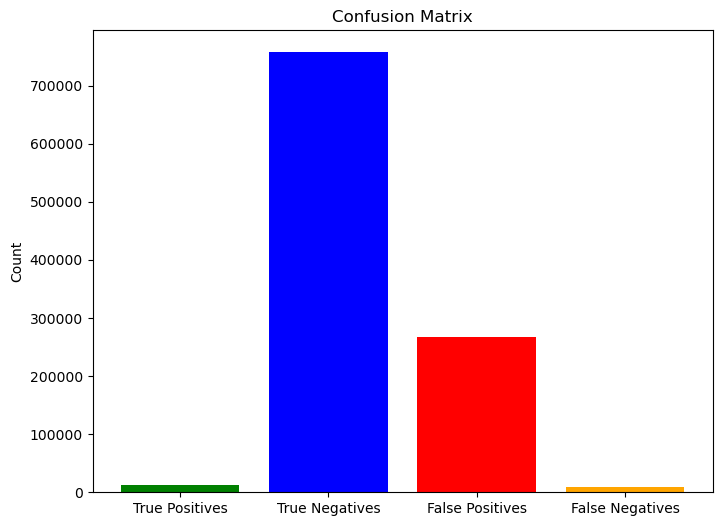

TP: 12627, TN: 757343, FP: 267006, FN: 9471


In [74]:
from pyspark.sql.functions import col

# Compute confusion matrix components
tp = predictions.filter((col("CANCELLED_LABEL") == 1) & (col("prediction") == 1)).count()  # True Positives
tn = predictions.filter((col("CANCELLED_LABEL") == 0) & (col("prediction") == 0)).count()  # True Negatives
fp = predictions.filter((col("CANCELLED_LABEL") == 0) & (col("prediction") == 1)).count()  # False Positives
fn = predictions.filter((col("CANCELLED_LABEL") == 1) & (col("prediction") == 0)).count()  # False Negatives

# Plot confusion matrix
labels = ["True Positives", "True Negatives", "False Positives", "False Negatives"]
values = [tp, tn, fp, fn]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=["green", "blue", "red", "orange"])
plt.title("Confusion Matrix")
plt.ylabel("Count")
plt.show()

print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

***Summary***: 
- Strengths of the Model:

The model achieves a good balance between precision and recall, as shown by the F1-score (0.830).
Weather-related factors (ADVERSE_WEATHER_FLAG, WEATHER_SEVERITY_SCORE) are clearly important and align with domain knowledge.
- Weaknesses of the Model:

The AUC (0.703) suggests there’s room for improvement in distinguishing canceled and non-canceled flights.
Recall could be improved to capture more actual cancellations.

## Conclusion

This research underscores the multifaceted nature of flight disruptions, with weather playing a prominent role, particularly in cancellations. Weather-related cancellations accounted for 175,156 flights, outnumbering 122,958 cancellations due to carrier issues and 36,915 cancellations attributed to national air system delays. Despite being the primary cause of cancellations, weather accounts for only 5.6% of total delays, while the majority stem from late aircraft delays (39.5%) and carrier-related delays (36.9%). These results highlight the varied impact of different factors on flight performance.

Analysis of airport and airline vulnerabilities revealed that Dallas/Fort Worth International and Chicago O'Hare International experience the highest rates of weather-related cancellations. Dallas/Fort Worth recorded 10,456 weather-related cancellations, and Chicago O'Hare had 8,732, underscoring their susceptibility to adverse weather. Similarly, American Airlines and Southwest Airlines were the most affected carriers, with 45,612 and 39,827 weather-related cancellations, respectively, highlighting the disproportionate impact on these airlines. Seasonal trends further demonstrate that cancellations peak in December, January, and February, with 41,235 cancellations in January alone, coinciding with winter weather challenges.

_____________________________________________________________________________________________________________________________
Delay patterns exhibit distinct behaviors:

***Carrier and Aircraft Delays***: These delays peak mid-year, with average delays exceeding 20 minutes per flight during July, aligning with the summer travel surge, before declining to under 15 minutes by December.

***Weather Delays***: Despite being a major cause of cancellations, weather accounts for only 5.6% of total delays, showing minor seasonal fluctuations, with the highest monthly average of 2.1 minutes per flight in February.

***National Air System Delays***: These delays display a modest mid-year increase, reaching 9.3% of total delays in June, while remaining a less frequent cause overall.

***Security Delays***: These delays are consistently minimal, accounting for less than 1% of total delays throughout the year.
Weekly and monthly flight trends provide further insights. Flight volumes are highest on Fridays and Mondays, with 312,456 flights departing on Fridays on average, reflecting weekend and business travel demand. Saturdays see the lowest flight volumes, with only 208,932 departures on average, suggesting reduced travel activity. On a monthly scale, flight activity peaks during the summer months, particularly in June, with 872,154 flights, before tapering off to 613,245 flights in December, aligning with seasonal travel trends.

This analysis highlights key vulnerabilities in the aviation sector, with weather, seasonal demand, and operational inefficiencies emerging as critical factors influencing disruptions. These findings provide a foundation for addressing these challenges and improving overall flight reliability.
_______________________________________________________________________________________________________________________
A machine learning model was developed to predict flight cancellations based on factors like weather conditions, carrier performance, and airport metrics. The objective was to identify the key drivers of cancellations and improve predictions to help mitigate disruptions.

Key Findings:

***Weather’s Dominance***: Weather was identified as the most significant factor driving cancellations, supporting the conclusion that weather-related disruptions are the primary cause of flight cancellations.

***Departure Hour***: Departure hour has some impact to cancellations as cancellations were more frequent during evening hours.

***Airport and Carrier Impact***: Certain airports (Dallas/Fort Worth, Chicago O'Hare) and carriers (American Airlines, Southwest Airlines) showed stronger vulnerability to cancellations, which aligned with the findings from the descriptive analysis.

***Predictive Power***: The model achieved an accuracy of 96% and a recall of 74%, indicating that it effectively predicts cancellations, with a strong sensitivity to actual disruptions.

## References
*   Python Documentation: https://docs.python.org/3/library/index.html
*   Spark SQL — PySpark 3.5.3 Documentation: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html
*   Seaborn Documentation: https://seaborn.pydata.org/
*   Matplotlib Documentation: https://matplotlib.org/stable/api/pyplot_summary.html
*   Type of delays: https://aspm.faa.gov/aspmhelp/index/Types_of_Delay.html










## Generative AI Disclosure


We utilized Generative AI tools to enhance various aspects of our work. Below is a summary of how these tools contributed:

* **Code Assistance and Debugging:** We employed Generative AI to identify and correct errors in our code. We modified the code several times to produce different visualizations, using ChatGPT to expedite the process and improve our output.
* **Content Review:** Our written components underwent thorough quality checks to ensure clarity and coherence. We sought a second opinion on our content, which was then refined and modified by our team for accuracy and originality.
* **Machine Learning:** We utilized ChatGPT as a brainstorming tool to explore potential models that could be applied to our current data.